# 数据探索

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import brfss

%config InlineBackend.figure_format = 'retina'

In [2]:
df = brfss.ReadBrfss()

In [3]:
df.head()

,sex,age,edu,marital,employ,income,health,bmi,height,weight,exercise,workhour,exemin,fruit,vegetable
0,F,63,4,1,8,3.0,5.0,40.18,1.78,127.01,0.0,NaN,NaN,0.0,1.0
1,F,52,6,2,3,1.0,3.0,25.09,1.73,74.84,1.0,60.0,168.0,0.0,0.0
2,F,71,4,2,7,NaN,4.0,22.04,1.80,71.67,NaN,NaN,NaN,NaN,NaN
3,F,63,4,1,8,8.0,5.0,28.19,1.70,81.65,0.0,NaN,NaN,1.0,0.0
4,F,61,5,1,8,NaN,5.0,24.37,1.63,64.41,0.0,45.0,NaN,NaN,1.0


**问题：富人会更胖吗？**

## 描述性统计

In [4]:
bmi_income = df[['bmi','income']].dropna()

In [13]:
len(bmi_income)

343092

In [5]:
bmi_rich = bmi_income[bmi_income.income == 8]['bmi']
bmi_ord = bmi_income[bmi_income.income != 8]['bmi']

In [36]:
bmi_rich.describe()

count    110259.000000
mean         27.450733
std           5.900353
min          12.050000
25%          23.690000
50%          26.570000
75%          30.040000
max          97.650000
Name: bmi, dtype: float64

In [37]:
bmi_ord.describe()

count    232833.000000
mean         28.537320
std           6.971436
min          12.020000
25%          24.030000
50%          27.370000
75%          31.620000
max          97.650000
Name: bmi, dtype: float64

In [19]:
len(bmi_rich)

110259

In [38]:
len(bmi_ord)

232833

### 中心趋势

In [94]:
mean_rich = bmi_rich.mean()
mean_ord = bmi_ord.mean()
print('BMI mean of rich people: %.2f' % mean_rich)
print('BMI mean of ordinary people: %.2f' % mean_ord)

BMI mean of rich people: 27.45
BMI mean of ordinary people: 28.54


In [114]:
median_rich = bmi_rich.median()
median_ord = bmi_ord.median()
print('BMI median of rich people: %.2f' % median_rich)
print('BMI median of ordinary people: %.2f' % median_ord)

BMI median of rich people: 26.57
BMI median of ordinary people: 27.37


In [63]:
## 对连续变量，不能这么求mode，mode是一个区间,但也可以将bmi看出离散的，因为只保留到小数后两位
# mode of rich people
mode_rich = bmi_rich.mode().iloc[0]
mode_count_rich = np.sum(bmi_rich == mode_rich)
print('BMI mode of rich people: %.2f (counts %d)' % (mode_rich, mode_count_rich))

# mode of ordinary people
mode_ord = bmi_ord.mode().iloc[0]
mode_count_ord = np.sum(bmi_ord == mode_ord)
print('BMI mode of ordinary people: %.2f (counts %d)' % (mode_ord, mode_count_ord))

BMI mode of rich people: 26.63 (counts 1246)
BMI mode of ordinary people: 26.63 (counts 2766)


**different measures**: difference between means

In [96]:
print("mean difference (rich - ordinary) :  %.2f" % (mean_rich - mean_ord))

mean difference (rich - ordinary) :  -1.09


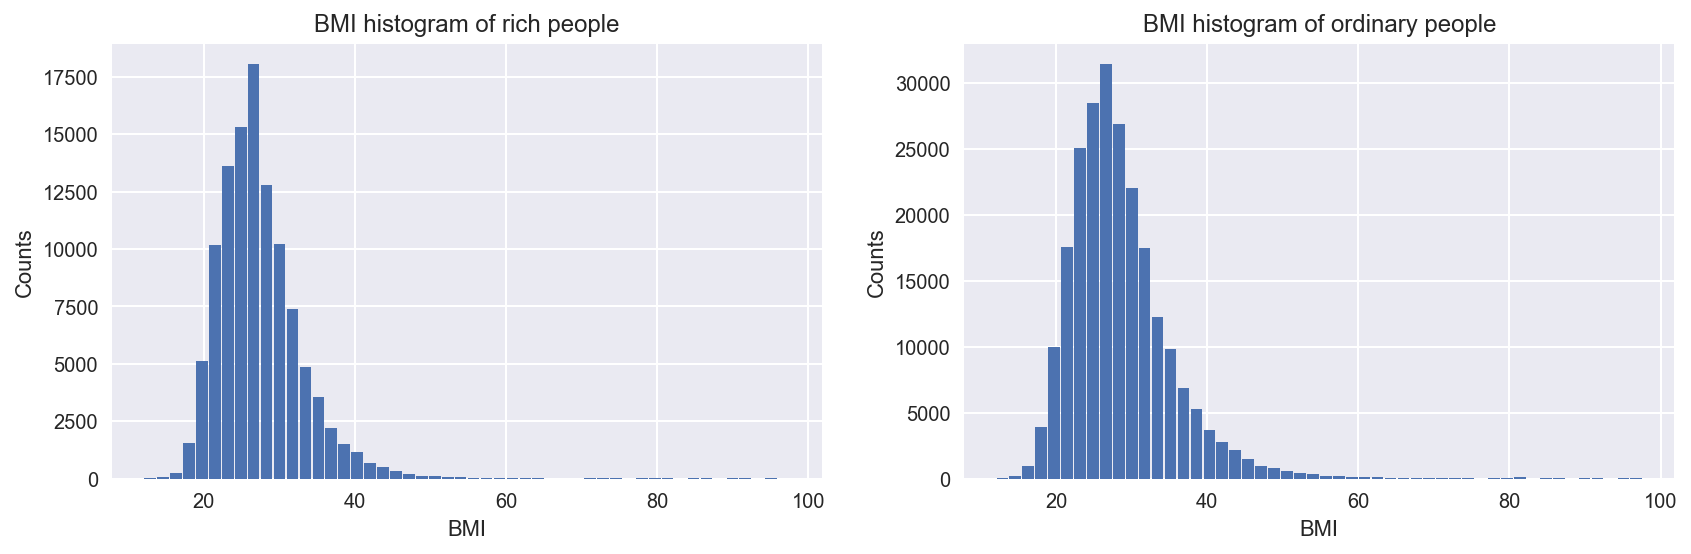

In [107]:
fig = plt.figure(figsize=(14,4))

# bmi histogram of rich people
p1 = fig.add_subplot(121)
plt.hist(bmi_rich, bins=50, rwidth=0.9)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI histogram of rich people')

#bmi histogram of ordinary people
p2 = fig.add_subplot(122)
plt.hist(bmi_ord, bins=50, rwidth=0.9)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI histogram of ordinary people')

plt.show()

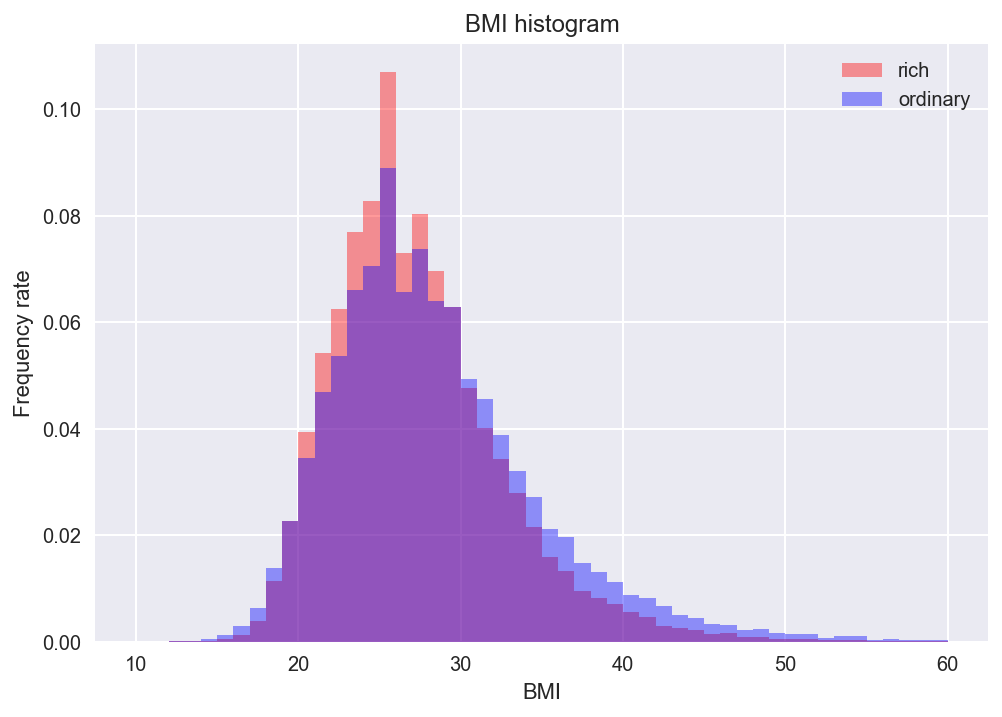

In [109]:
plt.hist(bmi_rich, bins=50, range=(10,60), normed=True, label='rich', alpha=0.4, color='red')
plt.hist(bmi_ord, bins=50, range=(10,60), normed=True, label='ordinary', alpha=0.4, color='blue')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('frequency rate')
plt.title('BMI histogram')
plt.show()

#### 直方图补充内容
* right/left skew
* 连续 or 不连续


mode range: (25.00, 26.00)
median: 26.57
mean: 27.45
skewness: 2.58


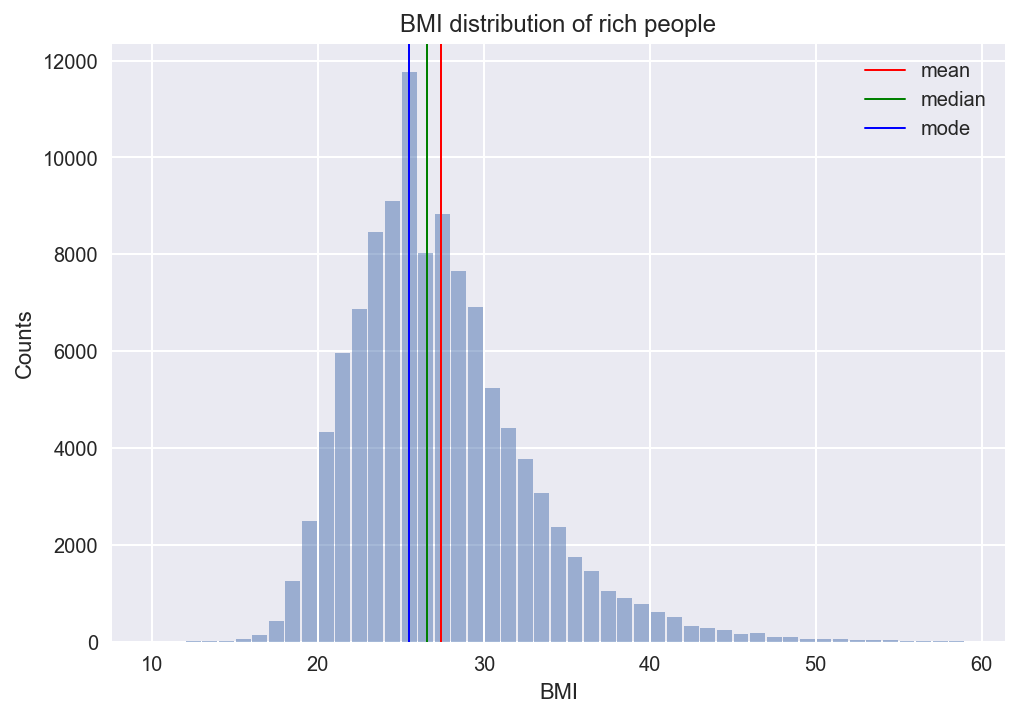

In [173]:
# mode range
bin_edge = np.arange(10,60,1)
counts, bins = np.histogram(bmi_rich, bin_edge)
mode_left = bins[np.argmax(counts)]
mode_right = bins[np.argmax(counts)+1]
mode_middle = (mode_left + mode_right) / 2
print('mode range: (%.2f, %.2f)' % (mode_left, mode_right))
print('median: %.2f' % median_rich)
print('mean: %.2f' % mean_rich)

# skewness
print('skewness: %.2f' %bmi_rich.skew())


# plot
plt.axvline(x=mean_rich, linewidth=1, color='red', label='mean')
plt.axvline(x=median_rich, linewidth=1, color='green', label='median')
plt.axvline(x=mode_middle, linewidth=1, color='blue', label='mode')
plt.legend()

plt.hist(bmi_rich, bins=bin_edge, range=(10,60), rwidth=0.9, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI distribution of rich people')
plt.show()



skewness: -0.74


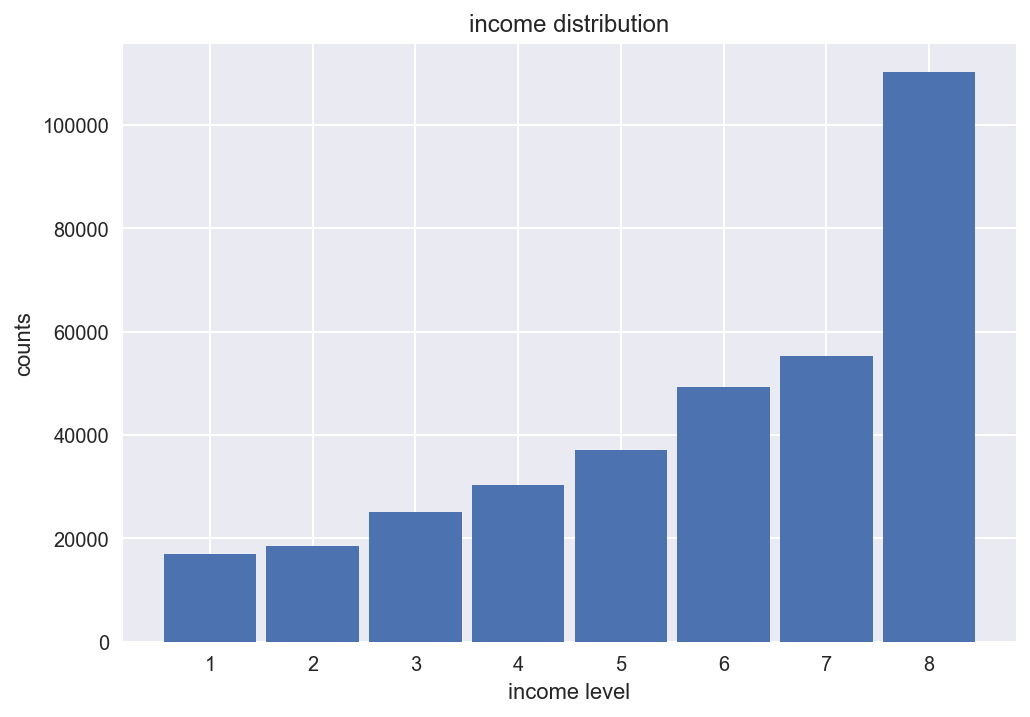

In [174]:
# skewness
print('skewness: %.2f' %bmi_income.income.skew())

bins = np.arange(1,10)
plt.hist(bmi_income.income, align='left', bins=bins, rwidth=0.9)
plt.title('income distribution')
plt.xlabel('income level')
plt.ylabel('counts')
plt.show()

### span 跨度

In [217]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)

def plot_ecdf(data, xlabel=None , ylabel='ECDF', label=None):
    
    # Compute ECDF: x, y
    x, y = ecdf(data)

    # Plot the ECDF with labeled axes
    _ = plt.plot(x, y, marker='.', markersize=3, linestyle='none', label=label)
    _ = plt.legend(markerscale=4)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    plt.margins(0.02)

#    plt.show()

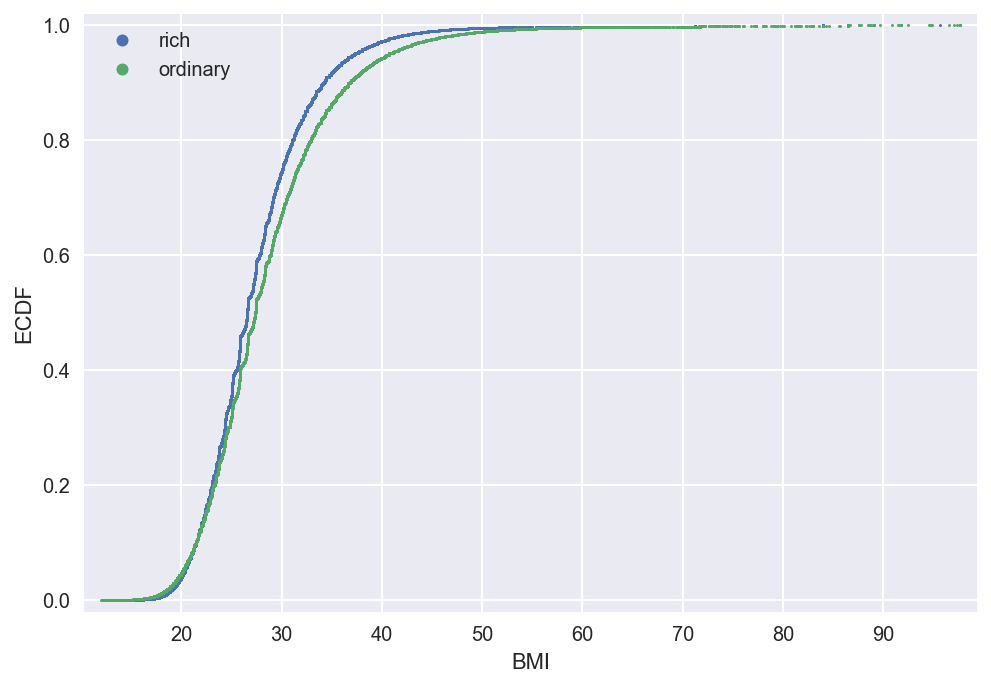

In [218]:
plot_ecdf(bmi_rich,label='rich')
plot_ecdf(bmi_ord, xlabel='BMI',label='ordinary')
plt.show()

In [232]:
q1 = bmi_rich.quantile(0.25)
q2 = bmi_rich.quantile(0.5)
q3 = bmi_rich.quantile(0.75)
IQR = q3 - q1

print('25%:  ', q1)
print('50%:  ', q2)
print('75%:  ', q3)
print('IQR:   %.2f' % IQR)

25%:   23.69
50%:   26.57
75%:   30.04
IQR:   6.35


In [10]:
print('min:  ', bmi_rich.min())
print('max:  ', bmi_rich.max())

min:   12.05
max:   97.65


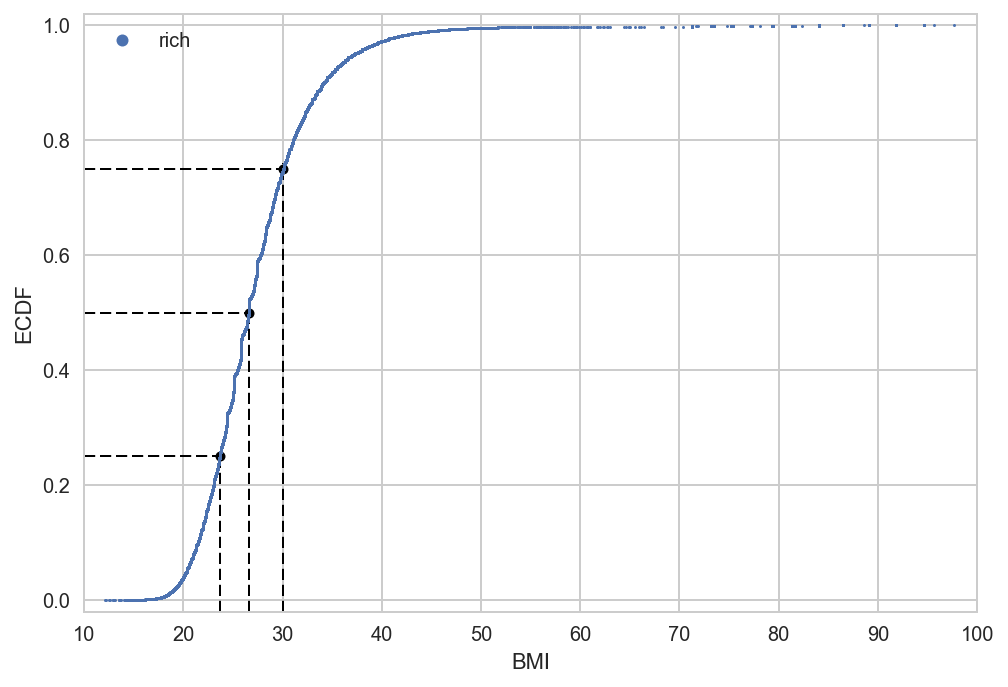

In [337]:

def plot_quantile(p, q, xmin=10, xmax=100):
    x_scale = (q - xmin) / (xmax - xmin)    
    plt.axhline(y=p, xmax=x_scale, linewidth=1, color='black', linestyle='--')
    plt.axvline(x=q, ymax=p, linewidth=1, color='black', linestyle='--')
    plt.plot(q, p, 'k.', markersize=10) 

plt.xlim(xmin=10, xmax=100)   
plot_quantile(0.25, q1)
plot_quantile(0.5, q2)
plot_quantile(0.75, q3)

plot_ecdf(bmi_rich,xlabel='BMI', label='rich')

plt.show()

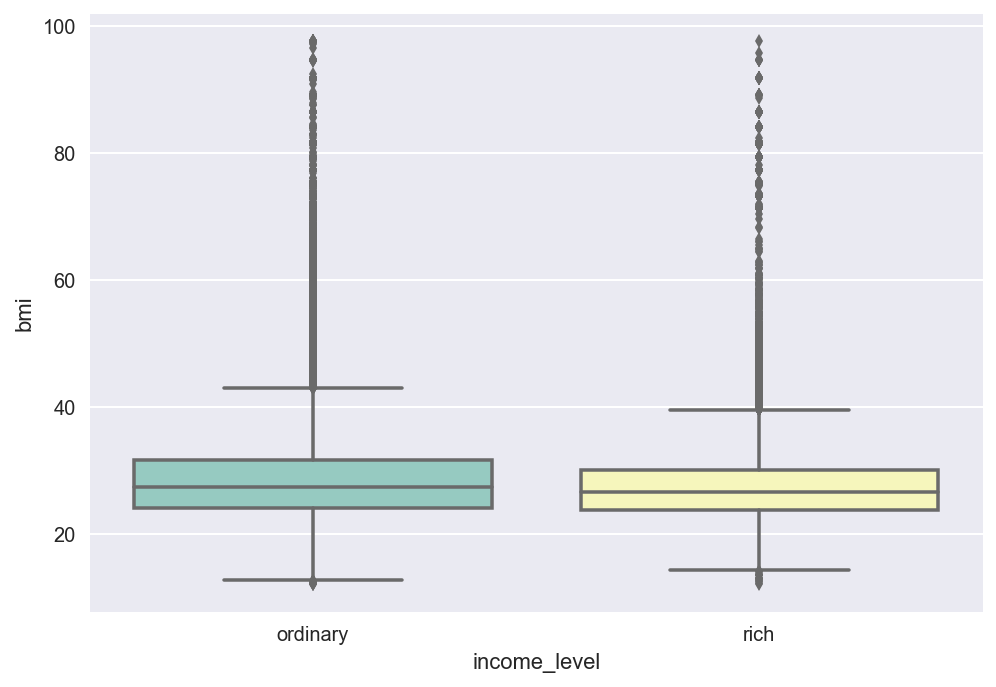

In [7]:
bmi_income['income_level'] = bmi_income.income.apply(lambda x: 'rich' if x==8 else 'ordinary')
sns.boxplot(x='income_level', y='bmi', data=bmi_income, palette="Set3")
plt.show()

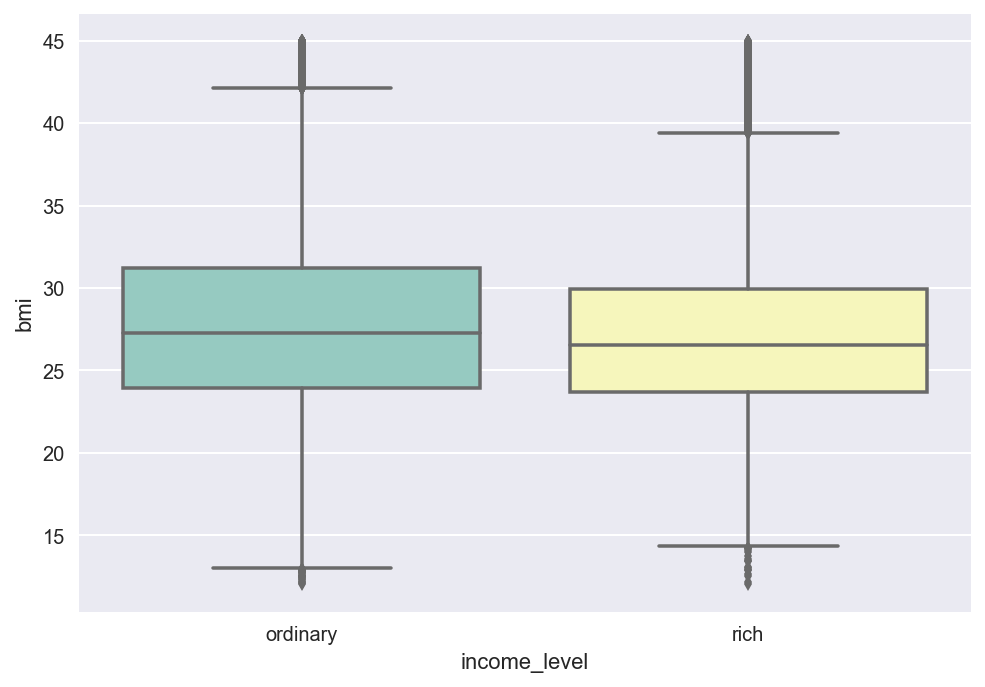

In [9]:
sns.boxplot(x='income_level', y='bmi', data=bmi_income[bmi_income.bmi < 45], palette="Set3")
plt.show()

### 方差和标准差

In [27]:
var = bmi_rich.var()
std = bmi_rich.std()
print('Variance:  %.2f' % var)
print('Standard deviation:  %.2f' % std)

Variance:  34.81
Standard deviation:  5.90


$$ \sigma^2 = \frac{\sum(x_i - \bar{x})^2}{N}$$

$$ \bar{x} = \frac{\sum{x_i}}{N}$$

$$ \sigma = \sqrt{\frac{\sum(x_i - \bar{x})^2}{N-1}}$$

反映波动，后面还会提到。

Standard difference :Cohen's d 
$$ d = \frac{\bar{x_1} - \bar{x_2}}{s_p}  $$

$$s_p = \sqrt{\frac{(n_1 - 1)s_1^2 +(n_2 - 1)s_2^2}{n_1+n_2-2}} $$


In [99]:
def cohen_d(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    sp = np.sqrt(((n1-1)*var1+(n2-1)*var2)/(n1+n2-2))
    return (x1-x2)/sp

print("Cohen's d: %.3f" %cohen_d(bmi_rich, bmi_ord))

Cohen's d: -0.163


### 相关性

covariance:
$$ cov(x,y) = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{N} $$

Pearson correlation coefficient:
$$ \rho = \frac{cov(x,y)}{\sigma_x \sigma_y} $$

In [82]:
df2 = df[['height','weight', 'bmi' ]].dropna()
height = df2.height
weight = df2.weight
bmi = df2.bmi

# covariance
np.cov(height,weight)

array([[  1.12563400e-02,   1.08190764e+00],
       [  1.08190764e+00,   4.67153513e+02]])

In [74]:
print('variance of height: %.4f' % np.var(height))
print('variance of weight: %.2f' % np.var(weight))

variance of height: 0.0113
variance of weight: 467.15


In [75]:
# Pearson correlation
np.corrcoef(height, weight)

array([[ 1.        ,  0.47180417],
       [ 0.47180417,  1.        ]])

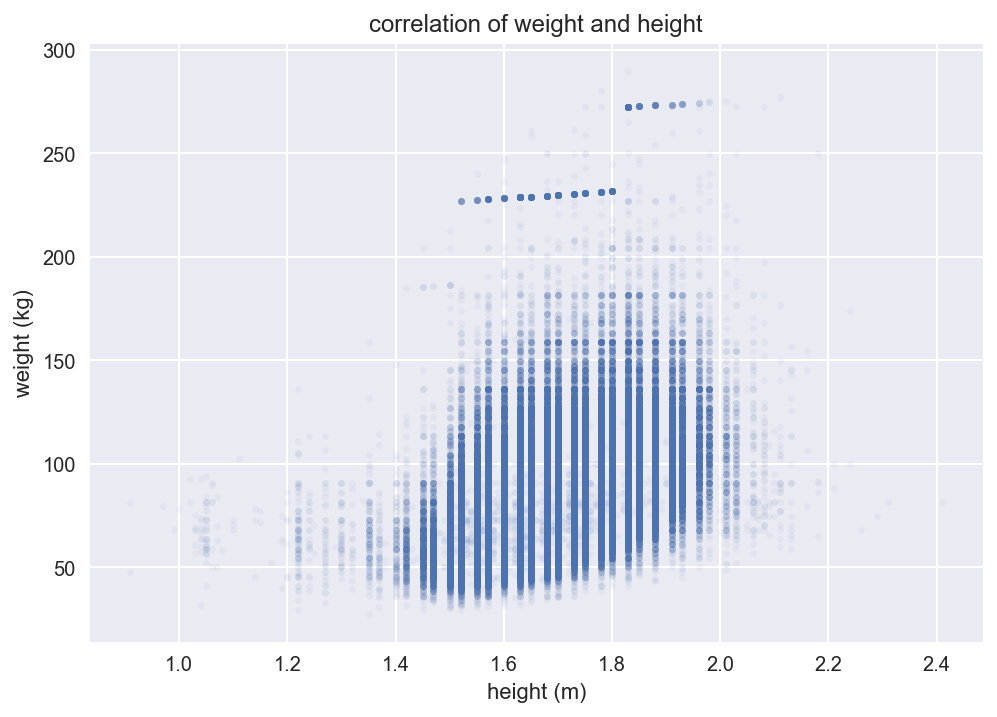

In [77]:
plt.plot(height,weight, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('height (m)')
plt.ylabel('weight (kg)')
plt.title('correlation of weight and height')
plt.show()

Pearson correlation coefficient: 0.87


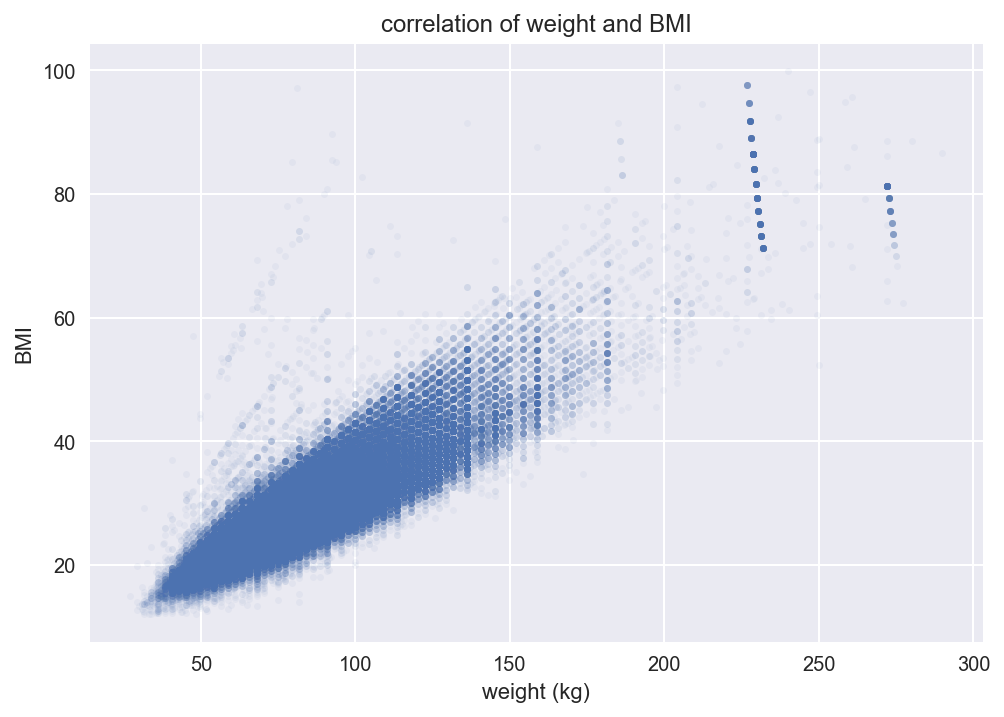

In [90]:
corr = np.corrcoef(weight, bmi)
print('Pearson correlation coefficient: %.2f' % corr[0,1] )
plt.plot(weight,bmi, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('weight (kg)')
plt.ylabel('BMI')
plt.title('correlation of weight and BMI')
plt.show()

Pearson correlation coefficient: -0.0060


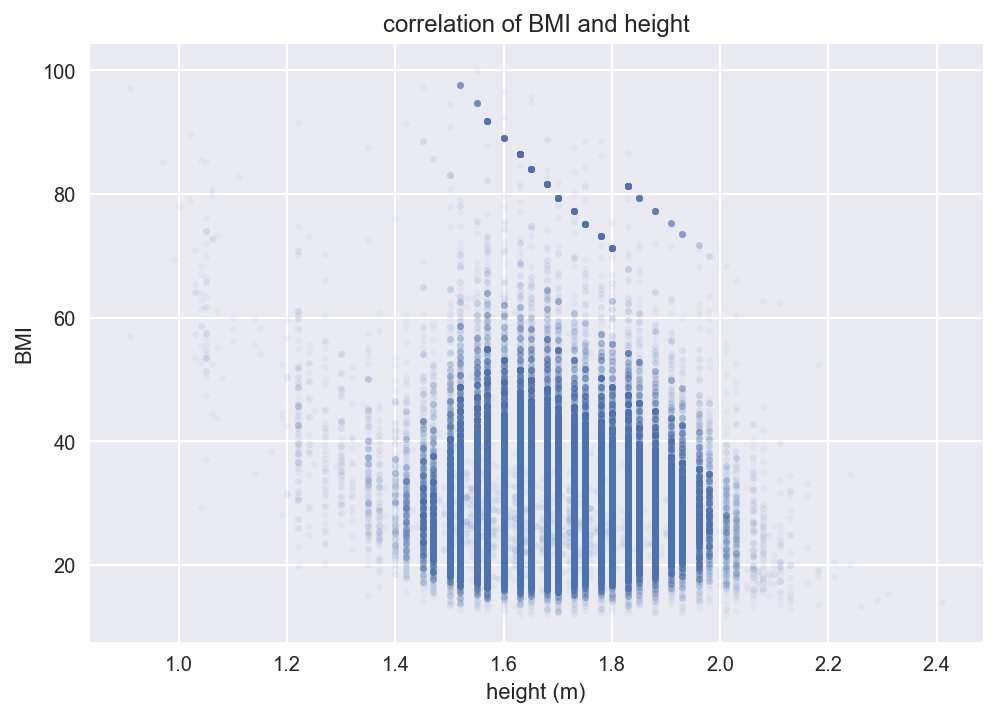

In [91]:
corr = np.corrcoef(height, bmi)
print('Pearson correlation coefficient: %.4f' % corr[0,1] )
plt.plot(height,bmi, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('height (m)')
plt.ylabel('BMI')
plt.title('correlation of BMI and height')
plt.show()

## 统计分布

### Modeling distribution

#### random number generator

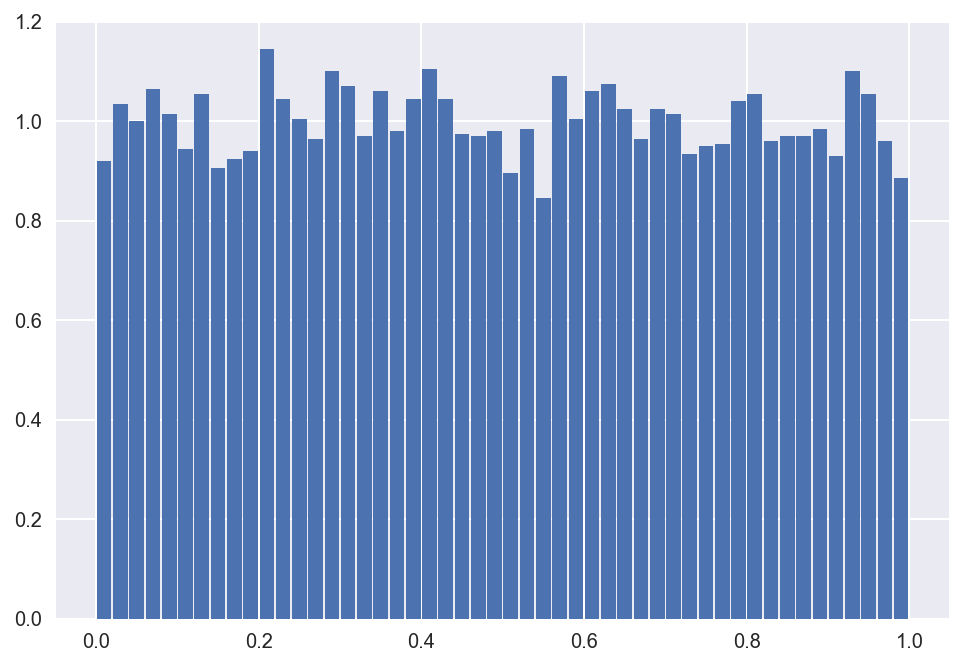

In [158]:
np.random.seed(11)

# Return random floats in the half-open interval [0.0, 1.0).
sample = np.random.random(size=10000)

plt.hist(sample, bins =50, rwidth=0.9, normed=True)
plt.show()

#### Binomial distribution 

投硬币，投10次， 正面朝上的概率

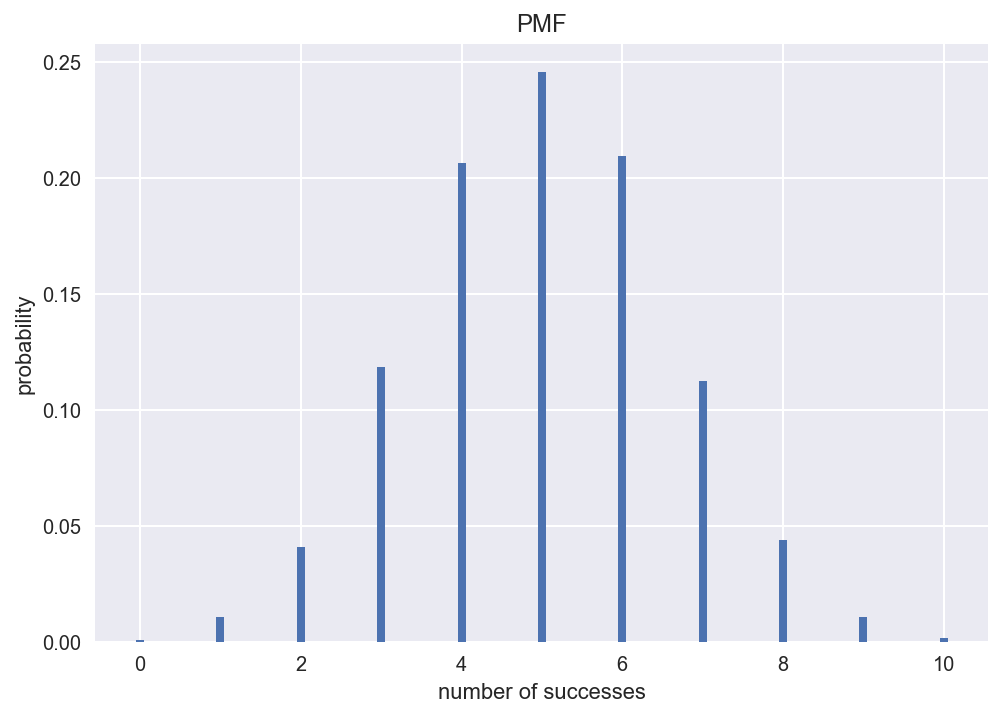

In [216]:
n=10
p=0.5
sample = np.random.binomial(n,p,size=10000)
bins = np.arange(12) 
plt.hist(sample, bins=bins, align='left', normed=True, rwidth=0.1)
plt.title('PMF')
plt.xlabel('number of successes')
plt.ylabel('probability')
plt.show()

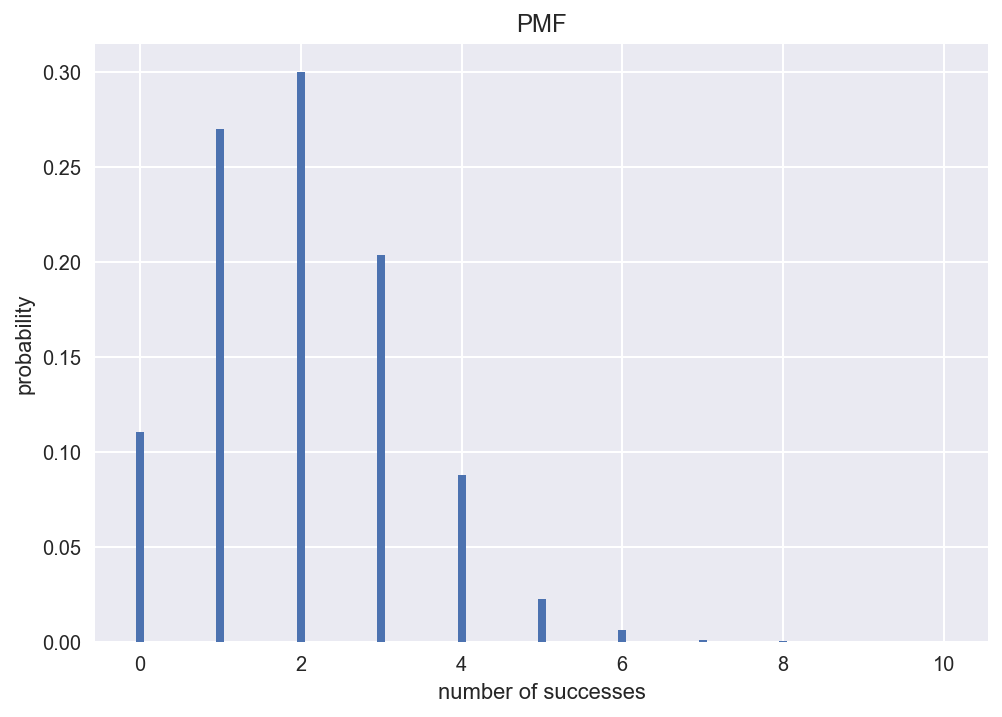

In [217]:
n=10
p=0.2
sample = np.random.binomial(n,p,size=10000)
bins = np.arange(12) 
plt.hist(sample, bins=bins, align='left', normed=True, rwidth=0.1)
plt.title('PMF')
plt.xlabel('number of successes')
plt.ylabel('probability')
plt.show()

#### Poisson distribution

等车，假设下一辆车来的时间与前一辆车无关。在一定时间段内来车的数量， 这段时间的平均来车数是lambda。1小时平均来6辆车。

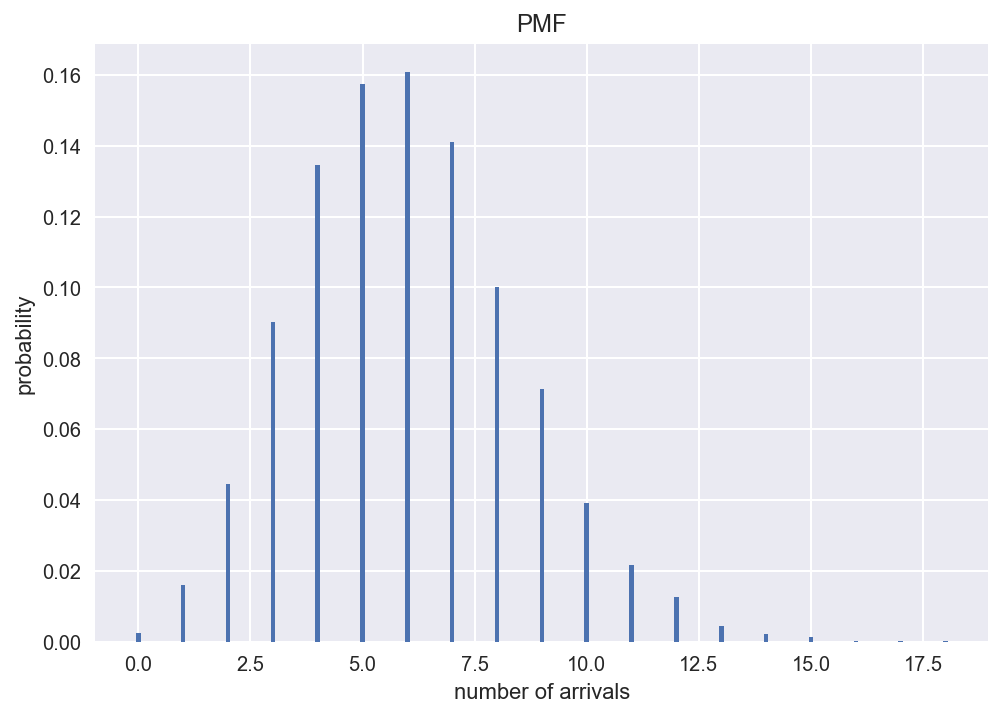

In [219]:
lamb = 6
sample = np.random.poisson(lamb, size=10000)
bins = np.arange(20)
plt.hist(sample, bins=bins, align='left', rwidth=0.1, normed=True)
plt.title('PMF')
plt.xlabel('number of arrivals')
plt.ylabel('probability')
plt.show()

In [215]:
np.mean(sample)

5.9682000000000004

#### exponential distribution

等车的时间， 和泊松分布的关系 the waiting time between arrivals of a Poisson process 每辆车平均间隔10min

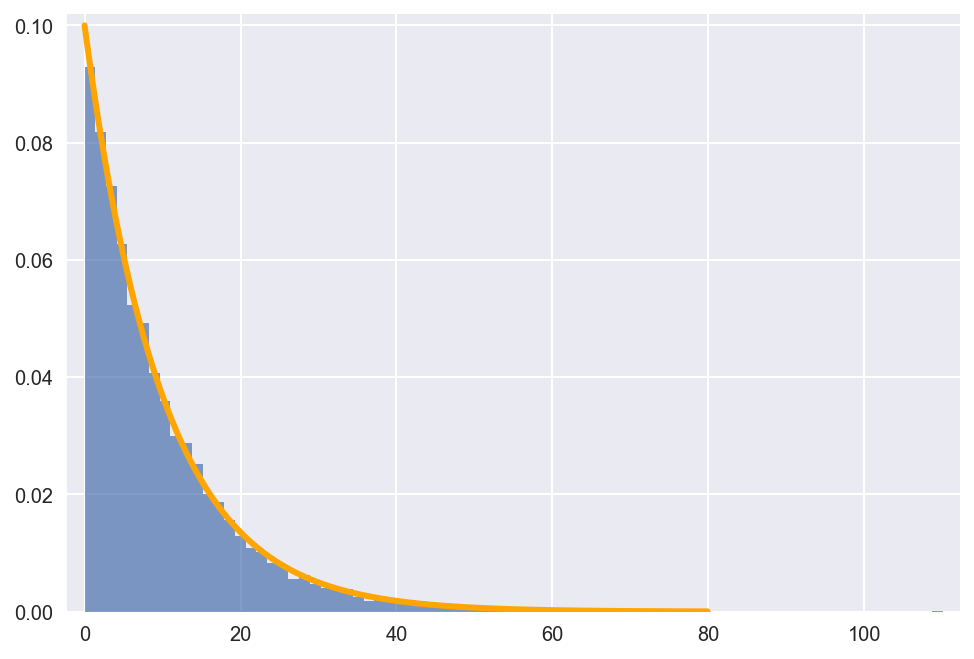

In [252]:
tau = 10
sample = np.random.exponential(tau, size=10000)
plt.hist(sample, bins=80, alpha=0.7, normed=True)
plt.margins(0.02)

lam = 1 / tau
x = np.arange(0,80,0.1)
y = lam * np.exp(- lam * x)
plt.plot(x,y,color='orange', lw=3)
plt.show()

In [238]:
np.mean(sample)

9.9436173723000572

#### normal distribution

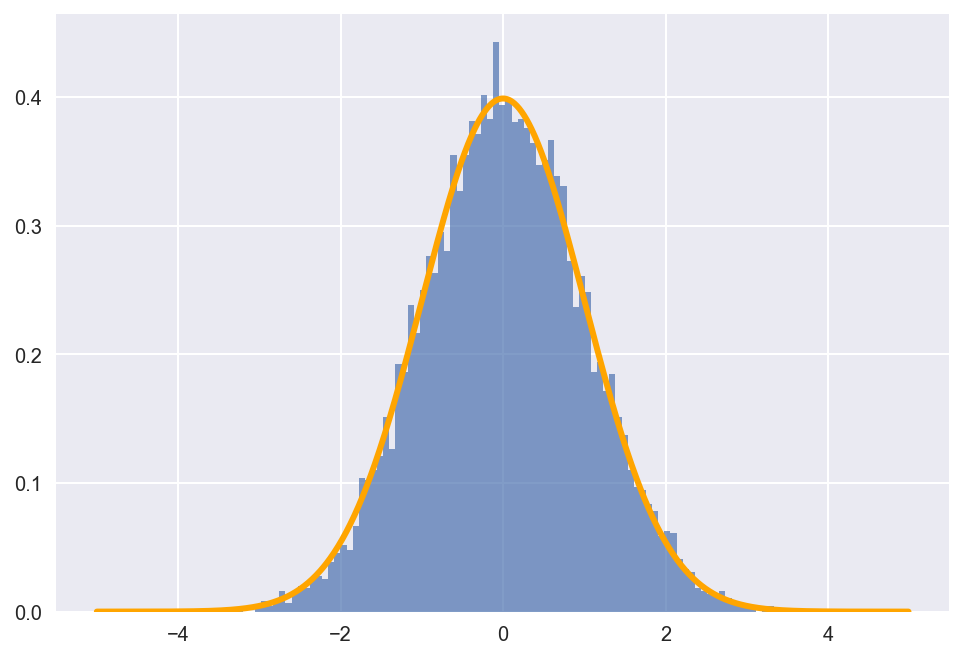

In [254]:
def norm_pdf(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

mu = 0
sigma = 1

sample = np.random.normal(mu, sigma, size=10000)
plt. hist(sample, bins=100, alpha=0.7, normed=True)

x = np.arange(-5, 5, 0.01)
y = norm_pdf(x, mu, sigma)
plt.plot(x,y, color='orange', lw=3)
plt.show()

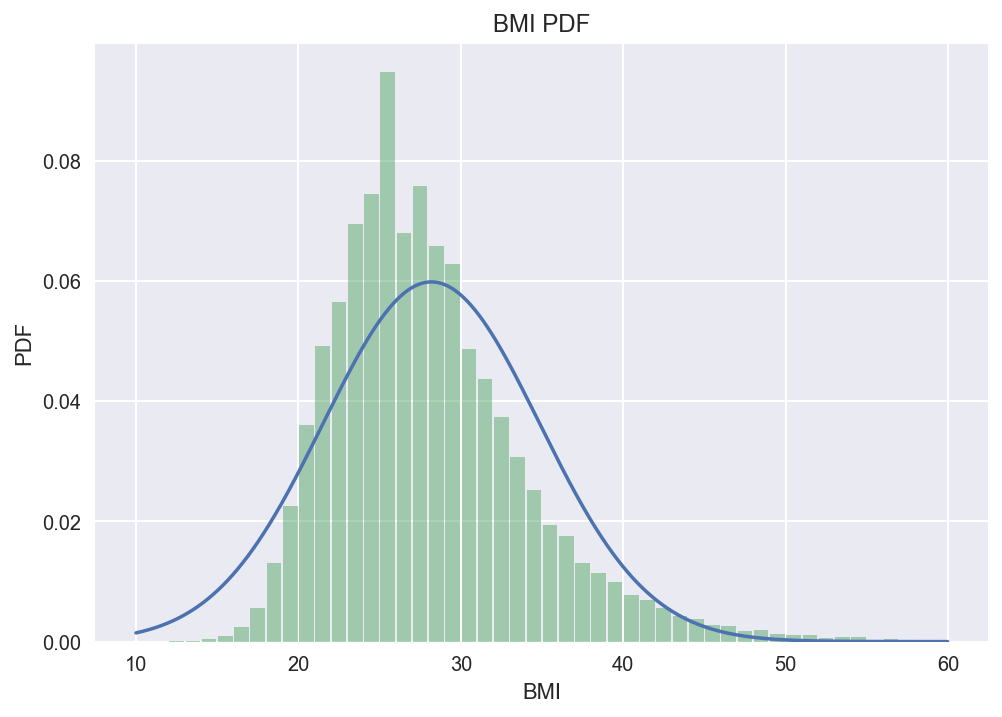

In [295]:
## bmi 的分布， 显然bmi右偏，不满足对称的正态分布

bmi = bmi_income.bmi
# plot normal distribution curve
bmi_std = bmi.std()
bmi_mean = bmi.mean()
x = np.arange(10,60,0.02)
y = norm_pdf(x, bmi_mean, bmi_std)
plt.plot(x,y)

# plot histogram
plt.hist(bmi, bins=50, range=(10,60), rwidth=0.9, alpha=0.5, normed=True)
plt.title('BMI PDF')
plt.xlabel('BMI')
plt.ylabel('PDF')
plt.show()

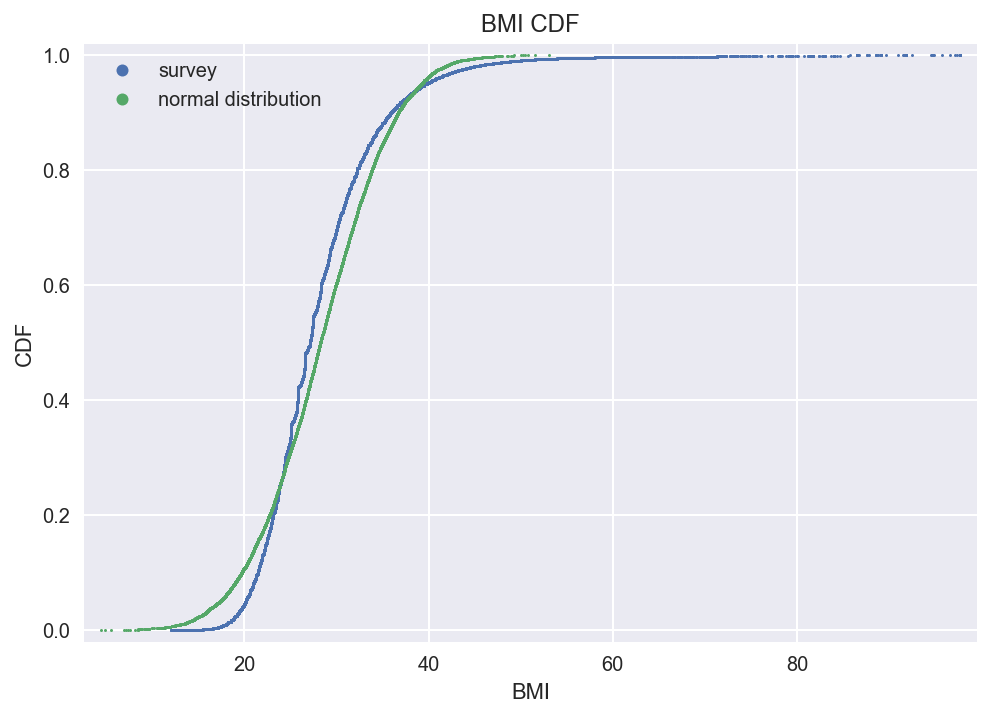

In [266]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)

def plot_ecdf(data, xlabel=None , ylabel='CDF', label=None):
    
    # Compute ECDF: x, y
    x, y = ecdf(data)

    # Plot the ECDF with labeled axes
    _ = plt.plot(x, y, marker='.', markersize=3, linestyle='none', label=label)
    _ = plt.legend(markerscale=4)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    plt.margins(0.02)


plot_ecdf(bmi, xlabel='BMI', label='survey')
sample = np.random.normal(bmi_mean, bmi_std, size=10000)
plot_ecdf(sample, xlabel='BMI', label='normal distribution')
plt.title('BMI CDF')
plt.show()

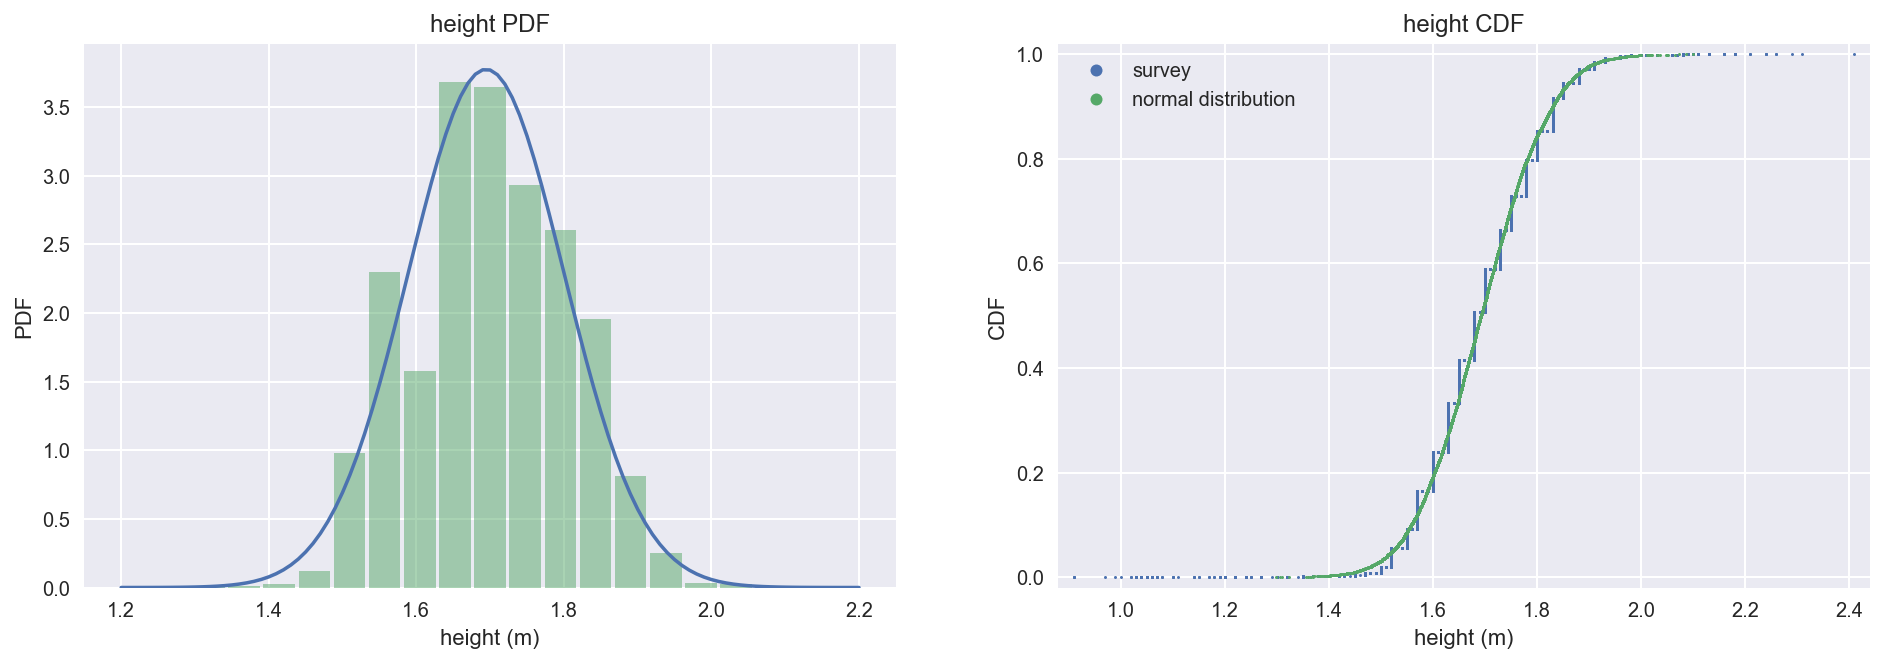

In [316]:
height = df.height.dropna()

fig = plt.figure(figsize=(16,5))

p1 = fig.add_subplot(121)
# plot normal distribution curve
height_std = height.std()
height_mean = height.mean()
x = np.arange(1.2,2.2,0.01)
y = norm_pdf(x, height_mean, height_std)
plt.plot(x,y)
# plot histogram
plt.hist(height, bins=21, range=(1.2,2.2), rwidth=0.9, alpha=0.5, normed=True)
plt.title('height PDF')
plt.xlabel('height (m)')
plt.ylabel('PDF')

p2 = fig.add_subplot(122)
plot_ecdf(height, xlabel='height', label='survey')
sample = np.random.normal(height_mean, height_std, size=10000)
plot_ecdf(sample, xlabel='height (m)', label='normal distribution')
plt.title('height CDF')
plt.show()

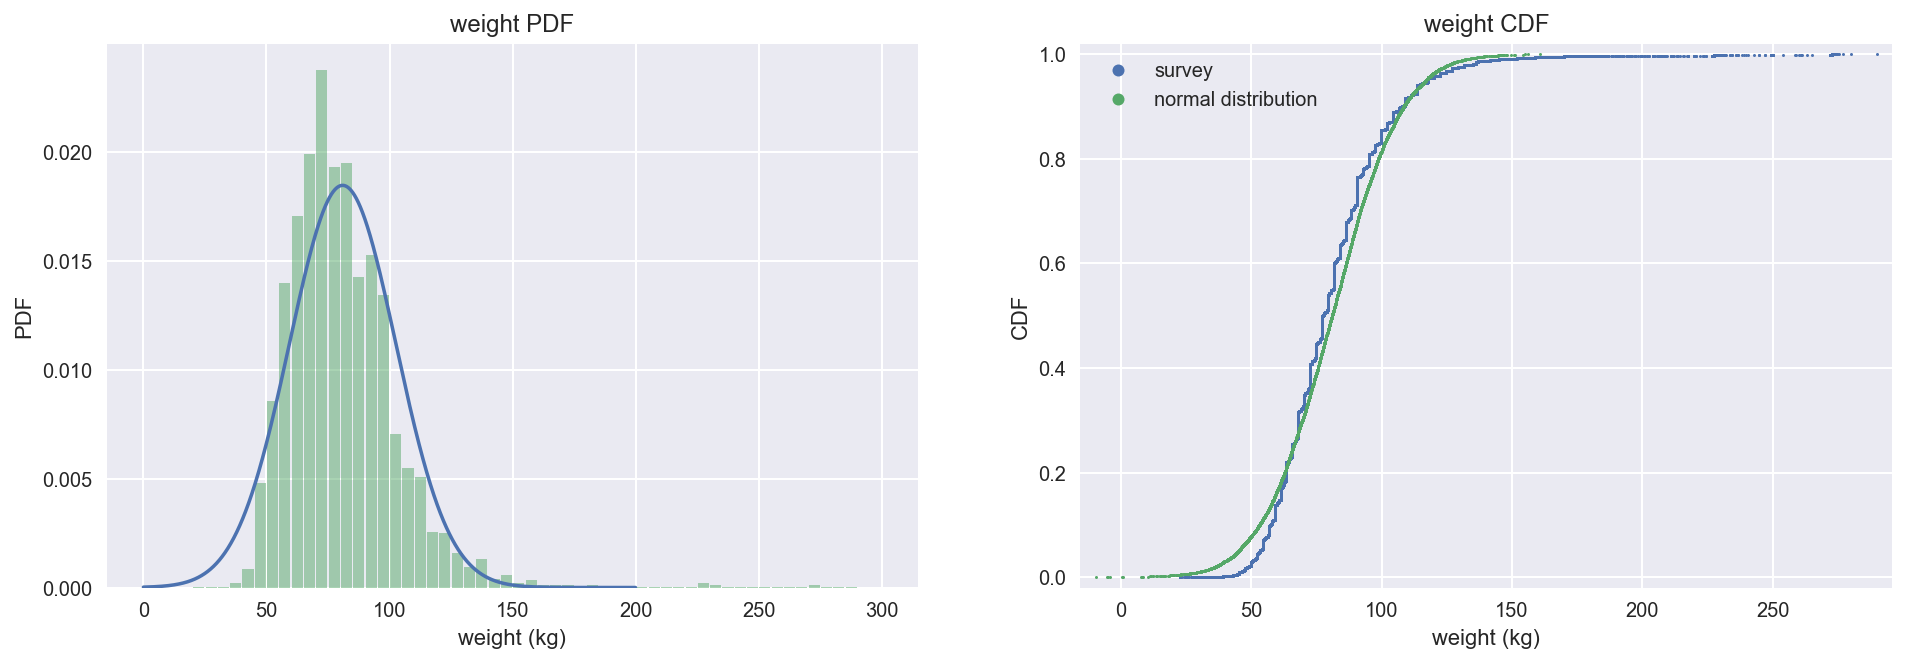

In [317]:
weight = df.weight.dropna()

fig = plt.figure(figsize=(16,5))

p1 = fig.add_subplot(121)
# plot normal distribution curve
weight_std = weight.std()
weight_mean = weight.mean()
x = np.arange(0,200,0.1)
y = norm_pdf(x, weight_mean, weight_std)
plt.plot(x,y)
# plot histogram
plt.hist(weight, bins=60, range=(0,300), rwidth=0.9, alpha=0.5, normed=True)
plt.title('weight PDF')
plt.xlabel('weight (kg)')
plt.ylabel('PDF')

p2 = fig.add_subplot(122)
plot_ecdf(weight, xlabel='weight', label='survey')
sample = np.random.normal(weight_mean, weight_std, size=10000)
plot_ecdf(sample, xlabel='weight (kg)', label='normal distribution')
plt.title('weight CDF')
plt.show()

#### The lognormal distribution

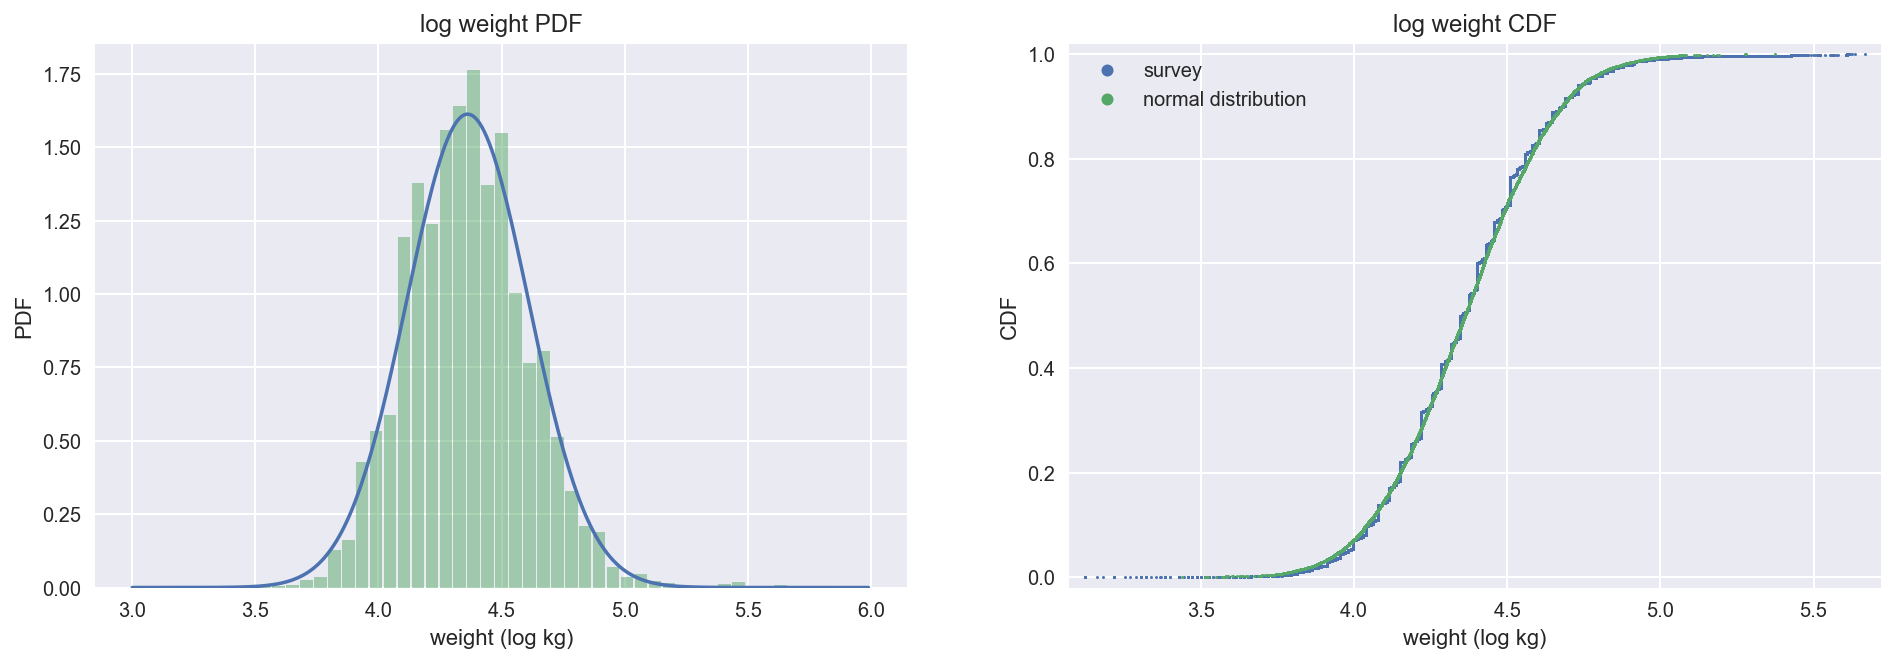

In [320]:
log_weight = np.log(df.weight.dropna())

fig = plt.figure(figsize=(16,5))

p1 = fig.add_subplot(121)
# plot normal distribution curve
log_weight_std = log_weight.std()
log_weight_mean = log_weight.mean()
x = np.arange(3,6,0.01)
y = norm_pdf(x, log_weight_mean, log_weight_std)
plt.plot(x,y)
# plot histogram
plt.hist(log_weight, bins=53, range=(3,6), rwidth=0.9, alpha=0.5, normed=True)
plt.title('log weight PDF')
plt.xlabel('weight (log kg)')
plt.ylabel('PDF')

p2 = fig.add_subplot(122)
plot_ecdf(log_weight, xlabel='weight (log kg)', label='survey')
sample = np.random.normal(log_weight_mean, log_weight_std, size=10000)
plot_ecdf(sample, xlabel='weight (log kg)', label='normal distribution')
plt.title('log weight CDF')
plt.show()

## Estimation

### Central Limit Theorem  & Sampling distribution

In [322]:
bmi = df.bmi.dropna()
len(bmi)

405058

standard Error
$$ SE = \frac{\sigma}{\sqrt{n}} $$

In [370]:
def sampling_distribution(data, sample_size=20, bins=40):
    
    sampling = [np.mean(np.random.choice(data, size=sample_size, replace=False)) for _ in range(1000)]
    
    mu = np.mean(data)
    se = np.std(data) / np.sqrt(sample_size)
    print('mean of sample means: %.2f' % np.mean(sampling))
    print('population means: %.2f' % mu)
    print('Standard deviation of sample means: %.2f' % np.std(sampling))
    print('Standard Error: %.2f' % se)

    fig = plt.figure(figsize=(16,5))
    p1 = fig.add_subplot(121)
    plt.hist(sampling, bins=bins, rwidth=0.9)
    p2 = fig.add_subplot(122)
    plot_ecdf(sampling, xlabel='sampling means', label='sampling ')
    sample = np.random.normal(mu, se, size=10000)
    plot_ecdf(sample, xlabel='sampling means', label='normal distribution')
    plt.show()

mean of sample means: 27.94
population means: 28.04
Standard deviation of sample means: 2.14
Standard Error: 2.10


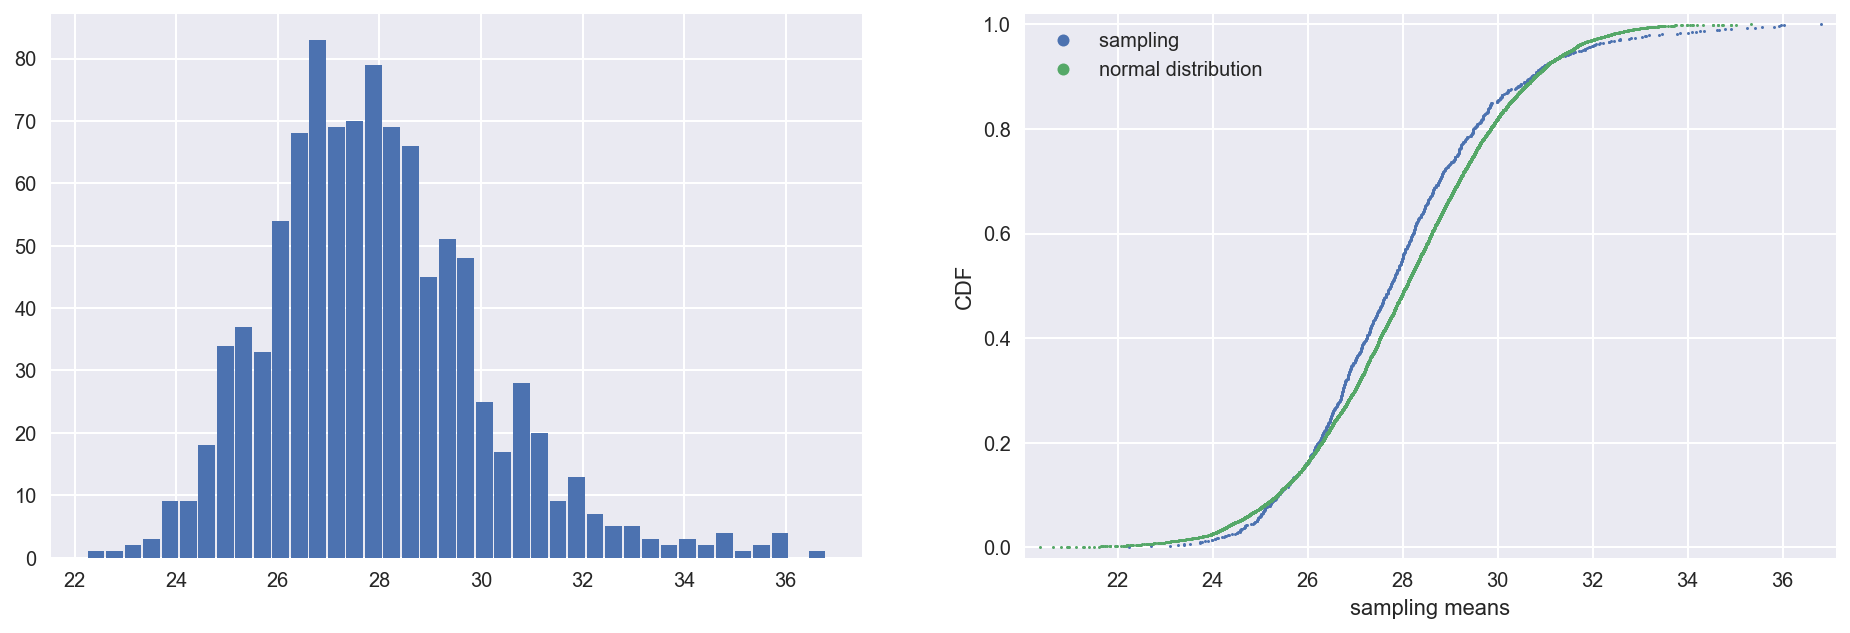

In [343]:
sampling_distribution(bmi, sample_size=10)

mean of sample means: 28.03
population means: 28.04
Standard deviation of sample means: 1.43
Standard Error: 1.49


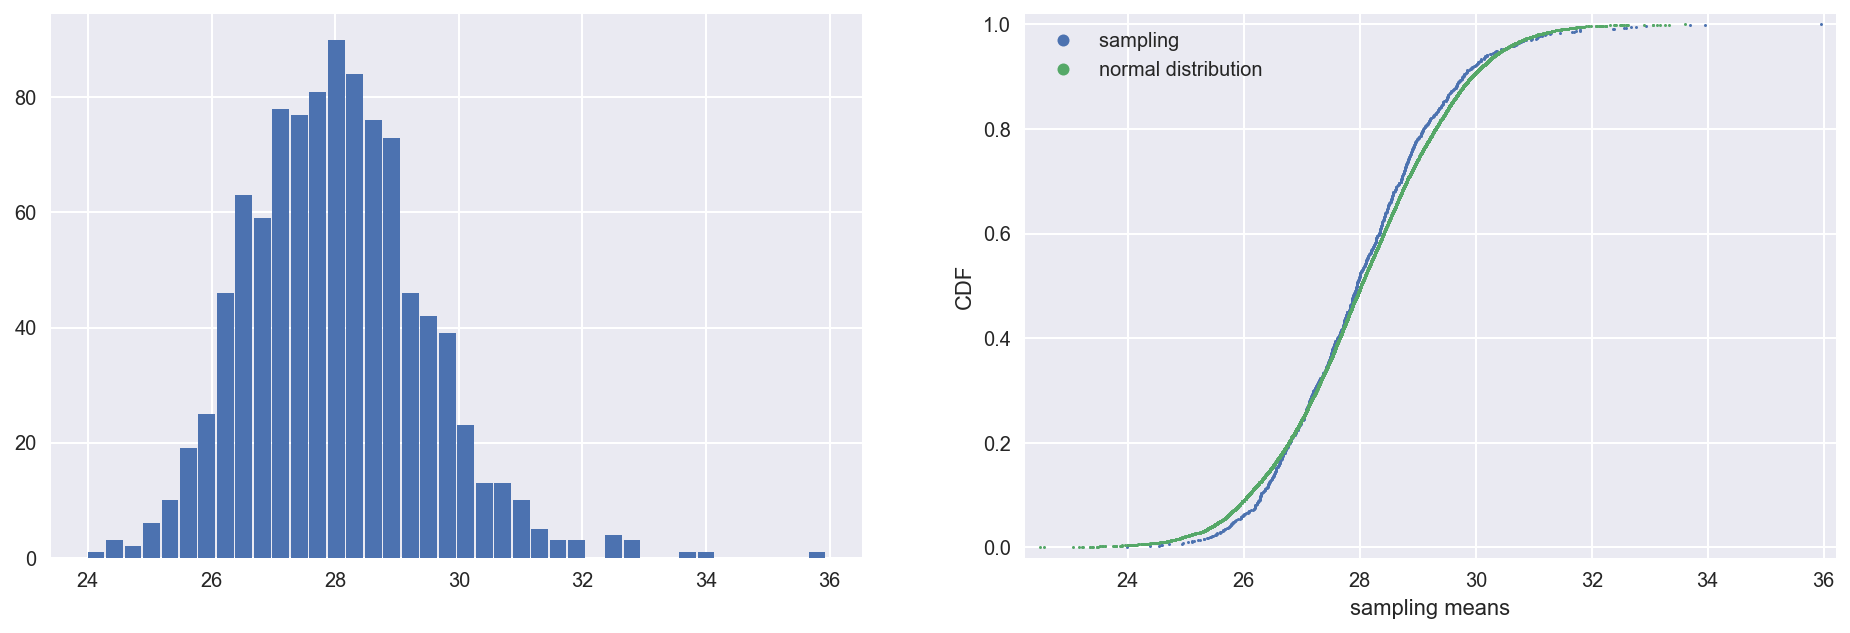

In [342]:
sampling_distribution(bmi, sample_size=20)

mean of sample means: 28.06
population means: 28.04
Standard deviation of sample means: 0.66
Standard Error: 0.67


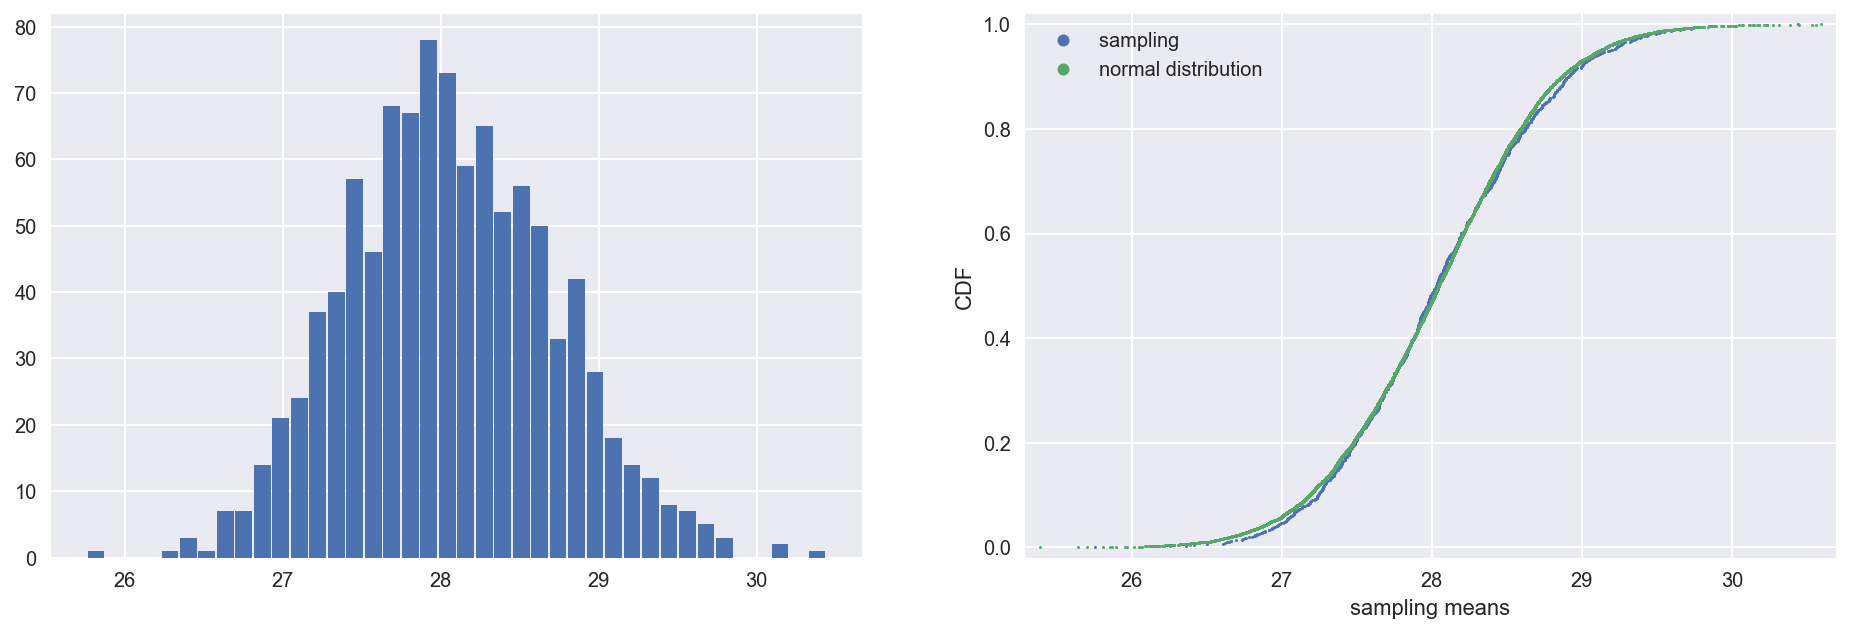

In [346]:
sampling_distribution(bmi, sample_size=100)

In [352]:
exemin = df[df.exemin != 0].exemin.dropna()

In [353]:
len(exemin)

280027

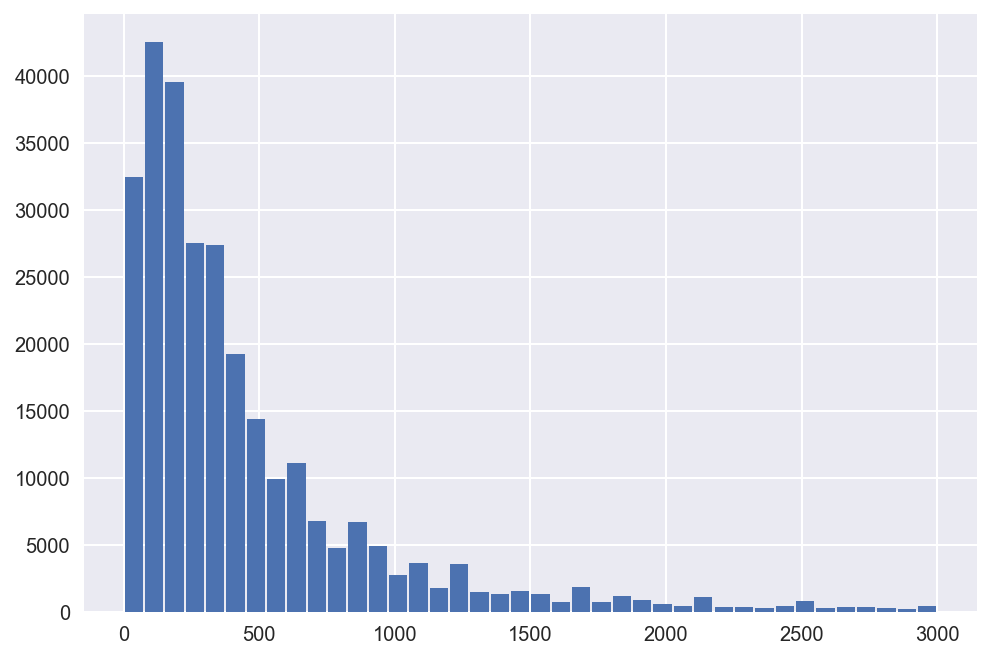

In [368]:
plt.hist(exemin,bins=40, range=(0,3000), rwidth=0.9)
plt.show()

mean of sample means: 499.98
population means: 499.37
Standard deviation of sample means: 23.52
Standard Error: 23.75


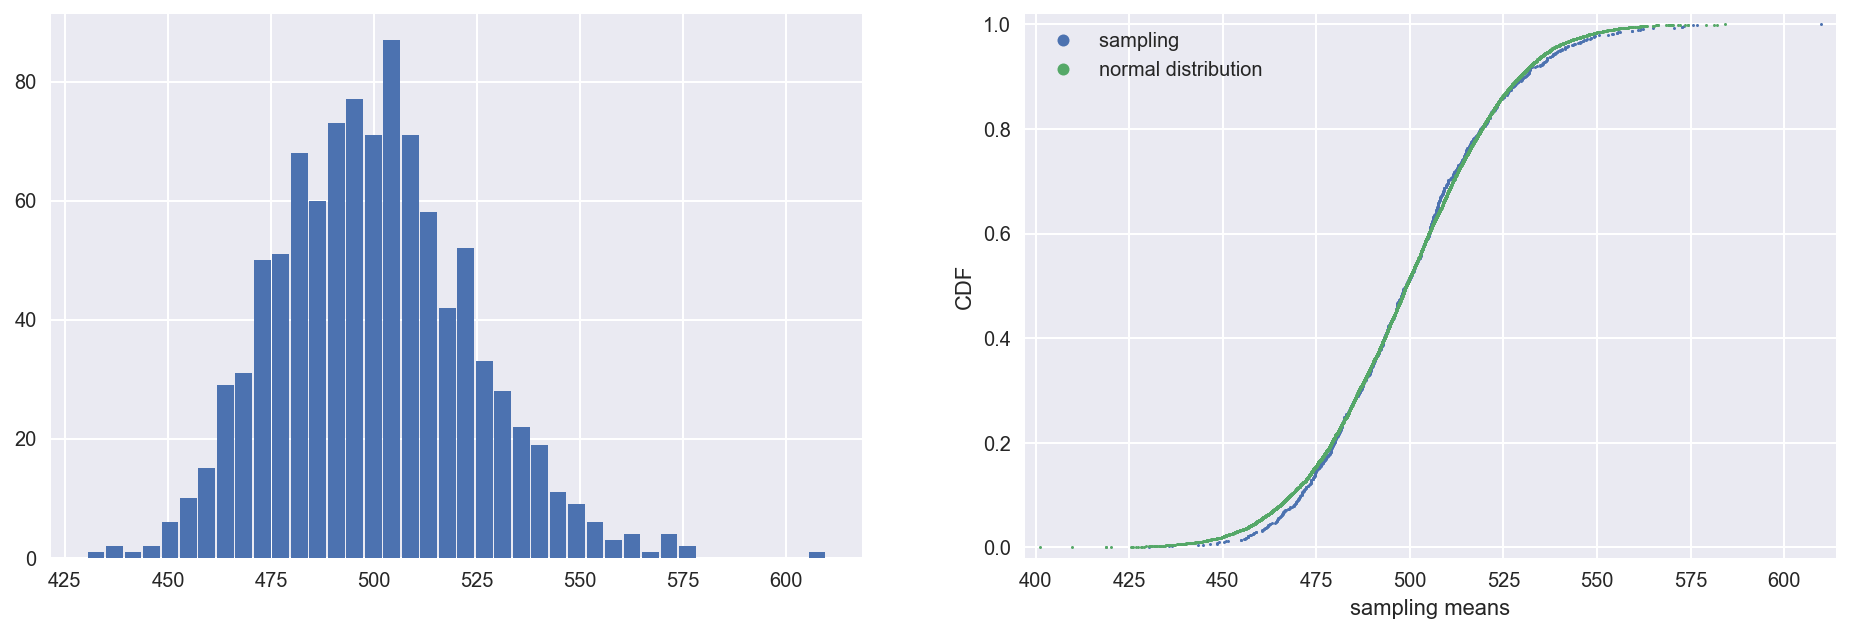

In [372]:
sampling_distribution(exemin, sample_size=1000)

#### normal distribution 特性

In [380]:
import scipy.stats
norm = scipy.stats.norm()

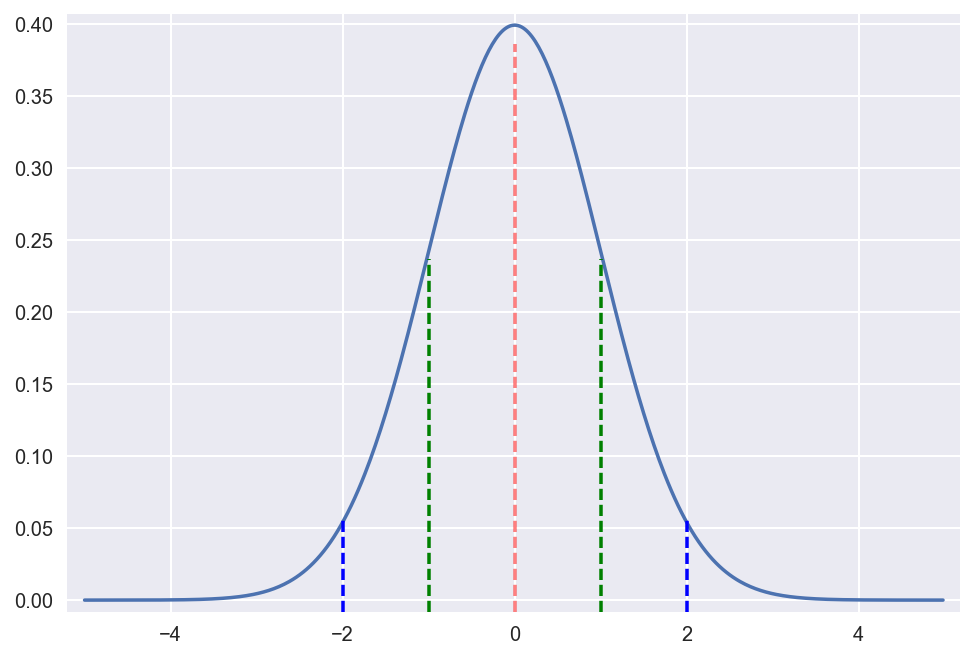

In [406]:
x = np.arange(-5, 5, 0.02)
y = norm.pdf(x)
plt.plot(x,y)
plt.axvline(x=0,ymax=0.95, linestyle='--', color='red', alpha=0.5)
plt.axvline(x=1,ymax=0.59, linestyle='--', color='green')
plt.axvline(x=-1,ymax=0.59, linestyle='--', color='green')
plt.axvline(x=2,ymax=0.16, linestyle='--', color='blue')
plt.axvline(x=-2,ymax=0.16, linestyle='--', color='blue')
plt.margins(0.02)
plt.show()


In [411]:
print('1 sigma : %.3f' % (norm.cdf(1) - norm.cdf(-1)))
print('2 sigma : %.3f' % (norm.cdf(2) - norm.cdf(-2)))
print('3 sigma : %.3f' % (norm.cdf(3) - norm.cdf(-3)))

1 sigma : 0.683
2 sigma : 0.954
3 sigma : 0.997


In [412]:
norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [413]:
norm.interval(0.99)

(-2.5758293035489004, 2.5758293035489004)

#### Confidence Interval

In [375]:
sample_size = 100    
sampling = [np.mean(np.random.choice(bmi, size=sample_size, replace=False)) for _ in range(1000)]

In [434]:
mean = np.mean(sampling)
std = np.std(sampling)
print('mean: %.2f' % mean)
print('std: %.2f' % std)

mean: 28.05
std: 0.66


In [435]:
mu = np.mean(bmi)
se = np.std(bmi) / np.sqrt(sample_size)
print(mu)
print(se)

28.042423998535817
0.665462611999


In [436]:
norm = scipy.stats.norm(mu, se)

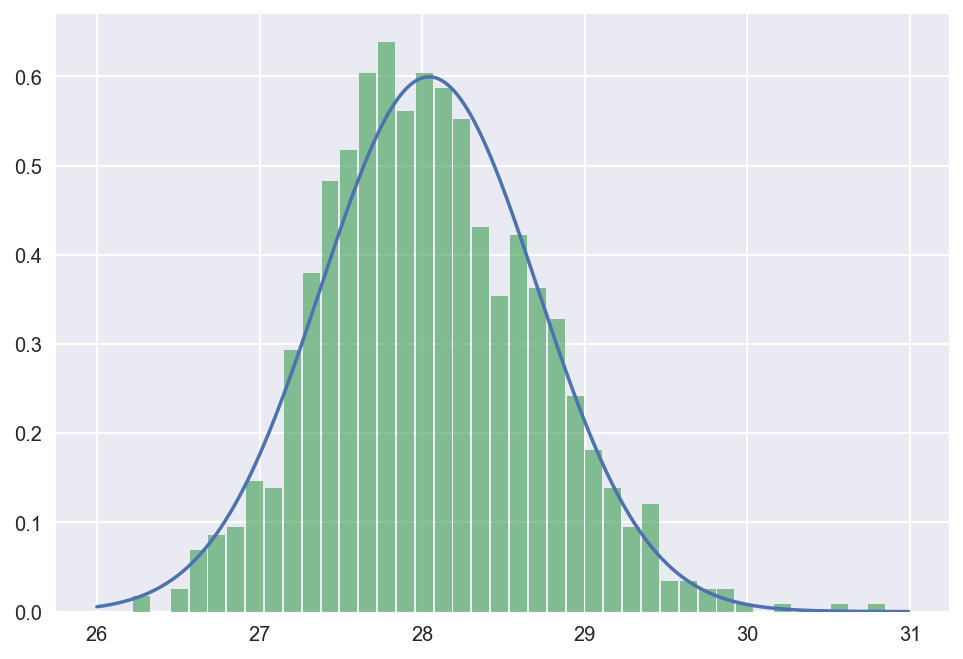

In [437]:
x = np.arange(26, 31, 0.01)
y = norm.pdf(x)
plt.plot(x,y)

plt.hist(sampling, bins=40, rwidth=0.9, normed=True, alpha=0.7)
plt.show()

In [423]:
np.percentile(sampling, [2.5, 97.5])

array([ 26.8404025,  29.4065475])

In [438]:
norm.interval(0.95)

(26.738141245959351, 29.346706751112283)

In [425]:
np.percentile(sampling, [0.05, 99.5])

array([ 26.26030605,  29.8458135 ])

In [439]:
norm.interval(0.99)

(26.328305902131977, 29.756542094939658)

#### 回到最初的问题，富人和一般人的bmi mean 估算

In [441]:
df2 = df[['bmi', 'income']].dropna()
bmi_rich = df2[df2.income == 8].bmi
bmi_ord = df2[df2.income != 8].bmi

In [447]:
def mean_ci(data):
    
    sample_size = len(data)
    std = np.std(data, ddof=1)
    se = std / np.sqrt(sample_size)
    
    point_estimate = np.mean(data)
    
    z_score = scipy.stats.norm.isf(0.025) # confidence level 95%
    
    confidence_interval = (point_estimate - z_score * se, point_estimate + z_score * se)

    return confidence_interval


In [448]:
mean_ci(bmi_rich)

(27.415906122294761, 27.485560606043915)

In [449]:
mean_ci(bmi_ord)

(28.509003170593907, 28.565637279855423)

In [475]:
def mean_plot(data, xrange1, xrange2):
    
    sample_size = len(data)
    std = np.std(data, ddof=1)
    se = std / np.sqrt(sample_size)
    
    point_estimate = np.mean(data)
    
    z_score = scipy.stats.norm.isf(0.025) # confidence level 95%
    
    left = point_estimate - z_score * se
    norm_left = scipy.stats.norm(left, se)
    x = xrange1
    y = norm_left.pdf(x)
    plt.plot(x,y)
    
    right = point_estimate + z_score * se
    norm_right = scipy.stats.norm(right, se)
    x = xrange2
    y = norm_right.pdf(x)
    plt.plot(x,y)
  
    plt.axvline(x=point_estimate, color='black')
    plt.axvline(x=left, color='blue', linestyle='--')
    plt.axvline(x=right, color='green', linestyle='--')

    plt.margins(0.02)
    plt.show()



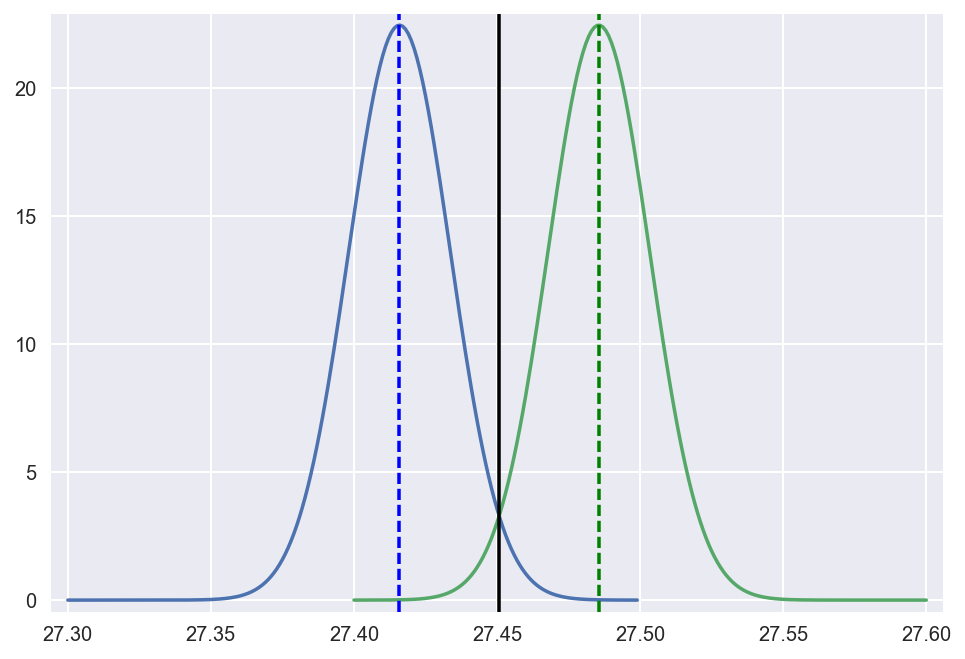

In [476]:
xrange1 = np.arange(27.3, 27.5, 0.001)
xrange2 = np.arange(27.4, 27.6, 0.001)
mean_plot(bmi_rich, xrange1, xrange2)

样本量小时，即使均值不一样，但也很难肯定有区别，因为CI有重合

In [460]:
mean_ci(bmi_rich[:500])

(27.849838839563304, 28.791561160436636)

In [461]:
mean_ci(bmi_ord[:500])

(28.200546441671069, 29.303493558328935)

In [458]:
np.mean(bmi_rich[:500])

28.32069999999997

In [459]:
np.mean(bmi_ord[:500])

28.75202

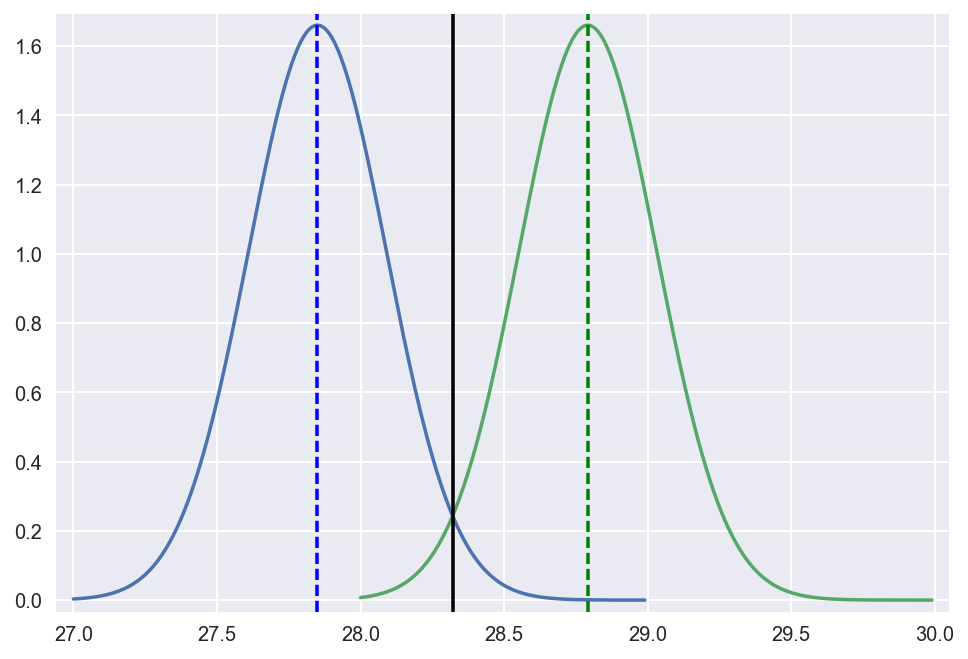

In [478]:
xrange1 = np.arange(27, 29, 0.01)
xrange2 = np.arange(28, 30, 0.01)
mean_plot(bmi_rich[:500], xrange1, xrange2)

## Hypothesis Testing

In [481]:
from scipy import stats

In [537]:
df2 = df[['bmi', 'income']].dropna()
bmi = df2.bmi
bmi_rich = df2[df2.income == 8].bmi
bmi_ord = df2[df2.income != 8].bmi

small_rich = bmi_rich[:500]
small_ord = bmi_ord[:500]

mid_rich = bmi_rich[:1000]
mid_ord = bmi_ord[:1000]

### 理论计算

#### ttest - one sample

假设bmi和富有无关，富人也应该和大家一样，等于总体的均值

In [495]:
mu = np.mean(bmi)
mu

28.18812531332513

In [496]:
def calc_ttest_1samp(data, pop_mean):
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    se = sample_std / np.sqrt(n)
    
    degree = n - 1
    t_stats = (sample_mean - pop_mean) / se
    p_value = 2* stats.t.sf(np.abs(t_stats), degree)  # two-tailed test

    return(t_stats, p_value)


In [497]:
# calculating by hand
t_stats, p_value = calc_ttest_1samp(bmi_rich, mu)
print("t statistic is %.2f" % t_stats)
print("p value is %.10f" % p_value)

t statistic is -41.50
p value is 0.0000000000


In [498]:
# use stats.ttest_1samp() for one sample test
t_stats, p_value = stats.ttest_1samp(bmi_rich, mu)
print("t statistic is %.2f" % t_stats)
print("p value is %.10f" % p_value)

t statistic is -41.50
p value is 0.0000000000


*small sample*

In [499]:
# calculating by hand
t_stats, p_value = calc_ttest_1samp(small_rich, mu)
print("t statistic is %.2f" % t_stats)
print("p value is %.10f" % p_value)

t statistic is 0.55
p value is 0.5813027152


In [503]:
# use stats.ttest_1samp() for one sample test
t_stats, p_value = stats.ttest_1samp(small_rich, mu)
print("t statistic is %.2f" % t_stats)
print("p value is %.10f" % p_value)

t statistic is 0.55
p value is 0.5813027152


In [546]:
# use stats.ttest_1samp() for one sample test
t_stats, p_value = stats.ttest_1samp(bmi_rich[:4000], mu)
print("t statistic is %.2f" % t_stats)
print("p value is %.10f" % p_value)

t statistic is -3.83
p value is 0.0001321090


#### ttest - two independent samples

In [505]:
# calculating by hand 
def calc_ttest_ind(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    
    pooled_var = ((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2)
    se = np.sqrt(pooled_var * (1/n1 + 1/n2))
    degree = n1 + n2 - 2
    
    t_stats = (x1 - x2) / se
    p_value = 2* stats.t.sf(np.abs(t_stats), degree)  # two-tailed test
    
    return(t_stats, p_value)
 

In [491]:
# calculating by hand
t_stats, p_value = calc_ttest_ind(bmi_rich, bmi_ord)
print("t statistic is %.2f" % t_stats)
print("p value is %.10f" % p_value)

t statistic is -44.72
p value is 0.0000000000


In [487]:
# use stats.ttest_ind() for two independent samples
t_stats, p_value = stats.ttest_ind(bmi_rich, bmi_ord)
print("t statistic is %.2f" % t_stats)
print("p value is %.10f" % p_value)

t statistic is -44.72
p value is 0.0000000000


*small samples*

In [506]:
# calculating by hand
t_stats, p_value = calc_ttest_ind(small_rich, small_ord)
print("t statistic is %.2f" % t_stats)
print("p value is %.10f" % p_value)

t statistic is -1.17
p value is 0.2439743004


In [507]:
# use stats.ttest_ind() for two independent samples
t_stats, p_value = stats.ttest_ind(small_rich, small_ord)
print("t statistic is %.2f" % t_stats)
print("p value is %.10f" % p_value)

t statistic is -1.17
p value is 0.2439743004


### simulation 

#### bootstrap - one sample

In [531]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [532]:
def bootstrap_pvalue_1samp(data, pop_stats, func, size=1):
    
    # observed statistics
    sample_stats = func(data)
    
    # Make an array of translated data
    translated_data = data - sample_stats + pop_stats

    # Take bootstrap replicates of translated data
    bs_replicates = draw_bs_reps(translated_data, func, size)

    # Compute fraction of replicates that are less than the observed statistics
    p = np.sum( bs_replicates <= sample_stats) / size

    return p

In [534]:
mu = np.mean(bmi)
bootstrap_pvalue_1samp(small_rich, mu, np.mean, size=100000)

0.71109999999999995

In [535]:
bootstrap_pvalue_1samp(mid_rich, mu, np.mean, size=100000)

0.52959999999999996

In [536]:
bootstrap_pvalue_1samp(bmi_rich, mu, np.mean, size=10000)

0.0

In [548]:
bootstrap_pvalue_1samp(bmi_rich[:4000], mu, np.mean, size=100000)

8.0000000000000007e-05

#### permutation - two samples

In [549]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates


In [550]:

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def permutation_pvalue(data_1, data_2, func, size=1):
    
    # Compute difference of mean impact force from experiment: empirical_diff_means
    empirical_test_stats = func(data_1, data_2)

    # Draw permutation replicates: perm_replicates
    perm_replicates = draw_perm_reps(data_1, data_2, func, size)

    # Compute p-value: p
    p = np.sum(np.abs(perm_replicates) >= np.abs(empirical_test_stats)) / len(perm_replicates)

    return p



In [551]:
permutation_pvalue(small_rich, small_ord, diff_of_means, size=10000)

0.23960000000000001

In [553]:
permutation_pvalue(bmi_rich, bmi_ord, diff_of_means, size=10000)

0.0

In [554]:
np.mean(mid_rich), np.mean(mid_ord)

(28.200399999999952, 29.21402999999994)

In [555]:
permutation_pvalue(mid_rich, mid_ord, diff_of_means, size=100000)

0.00014999999999999999

#### visualization

In [587]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)

def plot_ecdf(data, xlabel=None , ylabel='CDF'):
    
    # Compute ECDF: x, y
    x, y = ecdf(data)

    # Plot the ECDF with labeled axes
    _ = plt.plot(x, y, marker='.', markersize=3, linestyle='none')
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    plt.margins(0.02)

#    plt.show()

In [588]:
def permutation_plot(data_1, data_2, func, size=1):
    
    # Compute difference of mean impact force from experiment: empirical_diff_means
    empirical_test_stats = func(data_1, data_2)

    # Draw permutation replicates: perm_replicates
    perm_replicates = draw_perm_reps(data_1, data_2, func, size)

    # Compute p-value: p
    p = np.sum(np.abs(perm_replicates) >= np.abs(empirical_test_stats)) / len(perm_replicates)
   
    print('p-value =', p)
    print('observed mean diff: %.2f' % empirical_test_stats)
    
    # plot CDF
    plot_ecdf(perm_replicates, xlabel='mean difference')
    plt.axvline(x=empirical_test_stats, color='black', linestyle='--')
    plt.show()


p-value = 0.2427
observed mean diff: -0.43


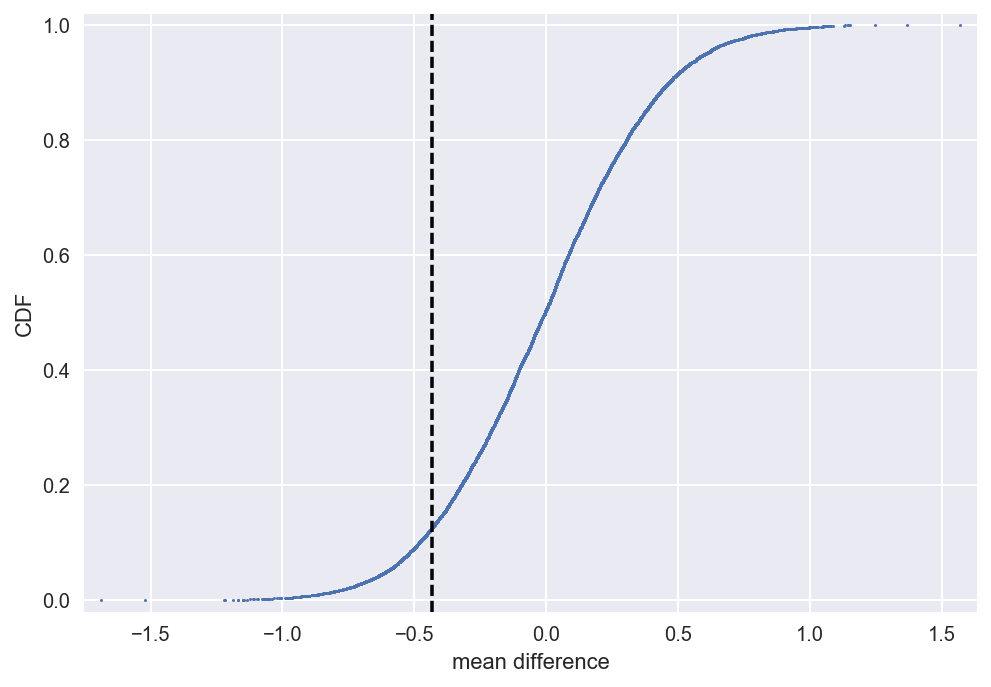

In [589]:
permutation_plot(small_rich, small_ord, diff_of_means, size=10000)

p-value = 0.0003
observed mean diff: -1.01


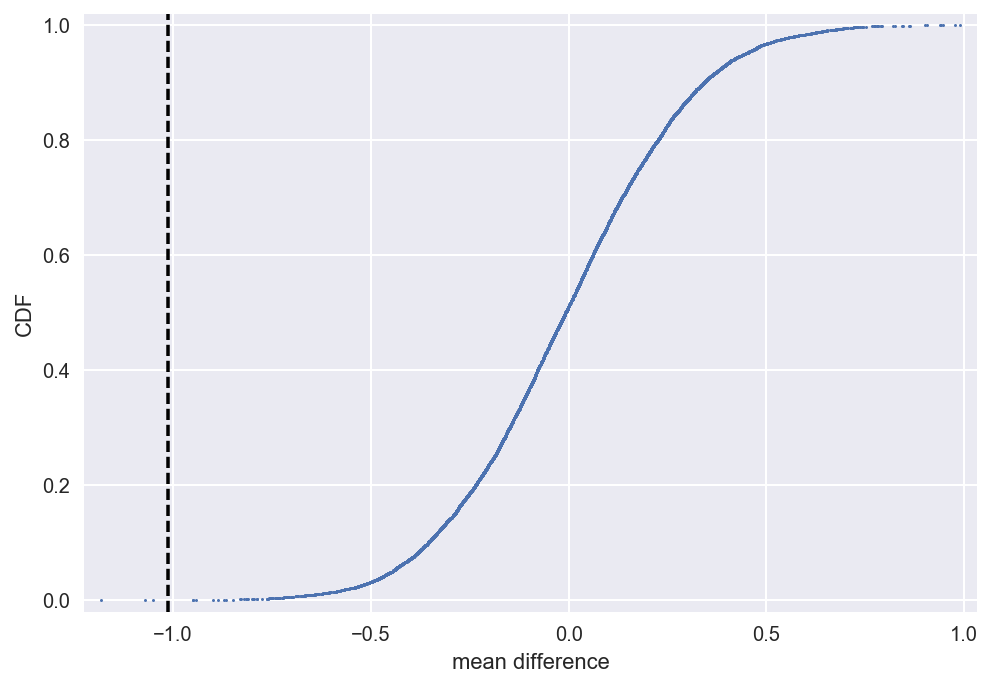

In [590]:
permutation_plot(mid_rich, mid_ord, diff_of_means, size=10000)

### other test statistics
* test of means / mean difference
* test of proportions
* test of correlaton
* $\chi^2$ test

#### Hypothesis test on Pearson correlation

In [591]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [597]:
def test_correlation(data_1, data_2, size=1):
    # Compute observed correlation: r_obs
    r_obs = pearson_r(data_1, data_2)

    # Initialize permutation replicates: perm_replicates
    perm_replicates = np.empty(size)

    # Draw replicates
    for i in range(size):
        # Permute data_1 
        data_1_permuted = np.random.permutation(data_1)

        # Compute Pearson correlation
        perm_replicates[i] = pearson_r(data_1_permuted, data_2)

    # Compute p-value: p
    p = np.sum(perm_replicates >= np.abs(r_obs)) / len(perm_replicates) # one-tailed test

    print('ovserved correlation: %.2f' % r_obs)
    print('p_Value: ', p)


In [599]:
df2 = df[['height','weight', 'bmi' ]].dropna()
height = df2.height
weight = df2.weight
bmi = df2.bmi

In [601]:
test_correlation(bmi, weight, size=10000)

ovserved correlation: 0.87
p_Value:  0.0


In [602]:
test_correlation(bmi, height, size=10000)

ovserved correlation: -0.01
p_Value:  0.0


In [603]:
test_correlation(bmi[:500], height[:500], size=10000)

ovserved correlation: 0.03
p_Value:  0.2169


#### test proportions

掷骰子60次，案例来自 thinkstats2 一书

|数值|1|2|3|4|5|6|
|---|---|---|---|---|---|---|
|次数|8|9|19|5|8|11|

test statistics
$$ \sum_i{|O_i - E_i |} $$

In [633]:
result = [8, 9, 19, 5, 8, 11]

# test-stats
def test_statistics(data):
    n = np.sum(data)
    expected = np.ones(6) * n / 6
    test_stats = np.sum(np.abs(data - expected))
    return test_stats

def simulate(n):
    values=[1,2,3,4,5,6]
    rolls = np.random.choice(values, n, replace=True)
    frequency = np.bincount(rolls)[1:]
    return frequency


def calc_pvalue(obse_data, func, size):
    
    obse_tstats = func(obse_data)
    n = np.sum(obse_data)

    repli_tstats = []
    for i in range(size):
        repli_simu = simulate(n)
        repli_tstats.append(func(repli_simu))
    
    p = np.sum(repli_tstats >= obse_tstats) / len(repli_tstats)

    return p

In [634]:
calc_pvalue(result, test_statistics, 10000)

0.1308

#### $\chi^2$ test

$$ \chi^2 = \sum_i {\frac{(O_i - E_i)^2}{E_i}} $$

In [635]:
def chi2(data):
    n = np.sum(data)
    observed = np.array(data)
    expected = np.ones(6) * n / 6
    chi_2 = np.sum((observed - expected)**2 / expected)
    return chi_2
    

In [636]:
calc_pvalue(result, chi2, 10000)

0.0419

用于测分布，不仅局限于一点

## 总结回顾

围绕“富人会更胖吗？” 这个问题， 使用多种统计学方法来找答案

* 均值 差
* 图表 CDF
* Cohen's d
* Confidence Interval ( 点 --> 范围）
* 假设检验（计算、模拟）